# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Linear Regression
##### **Contribution**    - Individual
##### **Team Member -**  Aman Mulla

# **Project Summary -**

**We are working with the Seoul Bike Sharing dataset. First, let's understand the dataset. This dataset contains the count of public bicycles rented per hour.**

**Below Graph will show you Average daily number of Seoul Bike (public bike rental system) rentals.**

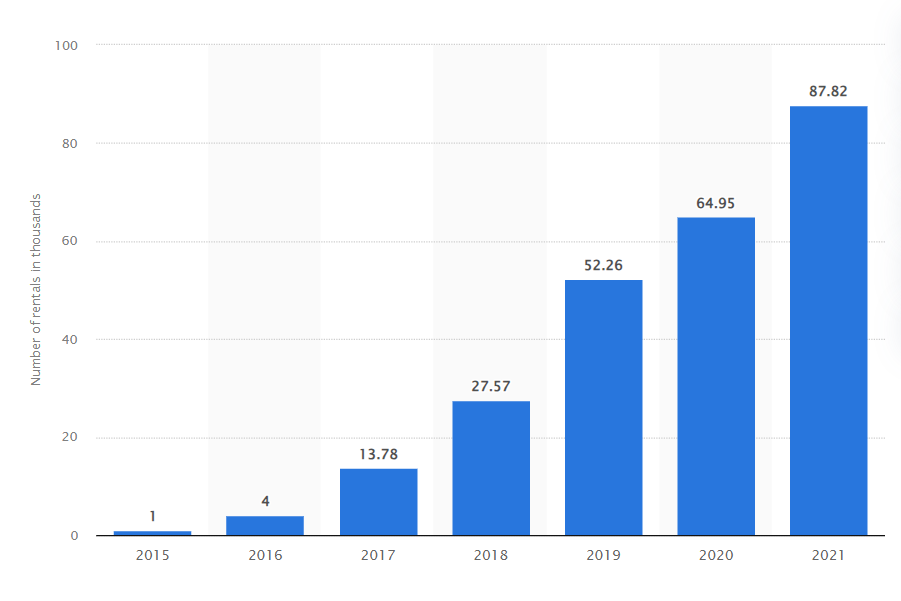

Datalink - https://www.statista.com/statistics/997380/south-korea-seoul-bike-daily-rental-number/

**Year after year, the demand for bike rentals is increasing, likely due to rising diesel and petrol prices. People are increasingly opting for rental bikes over purchasing new cars or bikes. This trend offers two significant benefits: it helps reduce pollution, and using a bike also contributes to better fitness.**


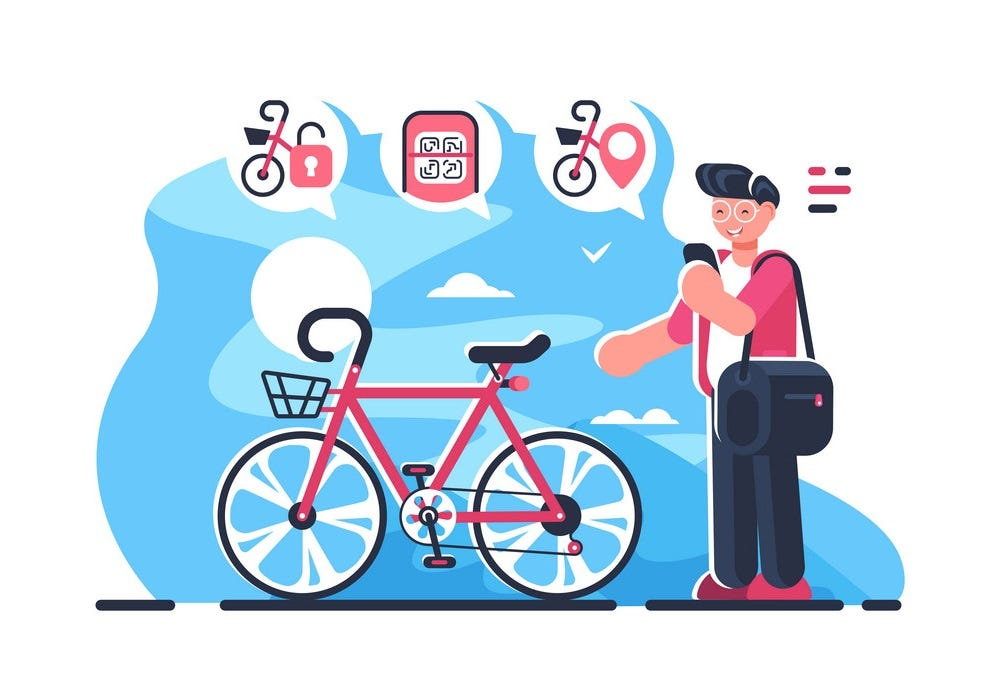

**For the Dataset, we have the following columns:**


*   **Date** : year-month-day

*   **Rented Bike count** - Count of bikes rented at each hour
*   **Hour** - Hour of he day


*   **Temperature**-Temperature in Celsius


*   **Humidity** - Humidity in %

*   **Windspeed** - Windspeed in m/s

*   **Visibility** - Visibility 10m
*   **Dew point temperature** - Dew-point temperature in Celsius


*   **Solar radiation** - Solar radiation in MJ/m2


*   **Rainfall** - Rainfall in mm

*   **Snowfall** - Snowfall in cm

*   **Seasons** - Winter, Spring, Summer, Autumn
*   **Holiday** - Holiday/No holiday


*   **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)



#### **There were approximately 8760 records and 14 attributes in the dataset.**







# **GitHub Link -**

# **Problem Statement**


**In various bustling cities, bike rental services have become a popular choice to enhance efficient traval and convenience. Ensuring a timely and continuous supply of rental bikes is essential for reducing waiting times and improving the experience for the public. The accurate prediction of hourly bicycle counts plays a significant role in achieving this goal.**
**Bike sharing systems streamline the process of joining, renting, and returning bikes through a network of convenient locations. People have the flexibility to rent bikes from one location and return them to either the same spot or a different one as per their needs. Memberships or requests facilitate the bike rental process, which is efficiently managed through a citywide network of automated stations.**
**Objective of this dataset is to forecast the demand for Seoul's Bike Sharing Program based on historical usage patterns, taking into account factors such as temperature, time, and other relevant data.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

### Firstly we will import necessary libraries. Which will help us to write code.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

### Will load dataset from google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_data = pd.read_csv('/content/drive/MyDrive/DataSets/SeoulBikeData.csv',encoding='ISO-8859-1')

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset First View

In [ ]:
# Dataset First Look

bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:

# To avoid type error will remane for some of column names

bike_data.rename(columns={'Wind speed (m/s)': 'windspeed'}, inplace=True)

bike_data.rename(columns={'Visibility (10m)': 'Visibility'}, inplace=True)

bike_data.rename(columns={'Humidity(%)': 'Humidity'}, inplace=True)

bike_data.rename(columns={'Dew point temperature(°C)': 'Dew_point_temperature'}, inplace=True)

bike_data.rename(columns={'Solar Radiation (MJ/m2)': 'Solar_Radiation'}, inplace=True)

bike_data.rename(columns={'Rainfall(mm)': 'Rainfall'}, inplace=True)

bike_data.rename(columns={'Snowfall (cm)': 'Snowfall'}, inplace=True)

bike_data.rename(columns={'Functioning Day': 'Functioning_Day'}, inplace=True)

bike_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count'}, inplace=True)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

bike_data.shape

(8760, 14)

There were 8760 records and 14 attributes in the dataset.

### Dataset Information

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature(°C)        8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   windspeed              8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

**So, from .info() there were 2 type of datatype in dataset, some of them are object type and some of them are int and float type. Becically, All Numerical columns are in int or float type.**

#### Duplicate Values

In [ ]:
bike_data[bike_data.duplicated()]

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,windspeed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day


**There were no any duplicate rows found in dataset.**

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

bike_data.isnull().sum()


Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature(°C)          0
Humidity                 0
windspeed                0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

**There were no any null or missing value found in dataset.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity',
       'windspeed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# Dataset Describe

bike_data.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity,windspeed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**This will give us all information about all numerical columns. Insights for this are as below**


1.   Average rented bike count 704.60.
2.   Maximum rented bike count 3556.00.
3.   Users were rented bike for average 11.50 hour. While maximum rented for 23.00 hour.
4.  Average temperatue was recored of 12.88°C while maximum temperatue was 39.40°C. Similerly average humidity was 58.22% and maximum humidity was 98.00%
5.   Average wind-speed was recored of 1.72m/s while maximum wind-speed was 7.40. Similerly average visibility was 1436 10/m and maximum visibility was 2000 10/m.
6.   Average Dew point temperature was recored of 4.07°C  while maximum Dew point temperature was 27.20°C. Similerly average Solar-Radiation was 0.569 MJ/m2 and maximum Solar-Radiation was 3.52 MJ/m2.
7.   Average rainfall was recored of 0.14mm  while maximum rainfall was 35mm. Similerly average Snowfall was 0.075CM and maximum Snowfall was 8.80CM.

### Check Unique Values for each variable.

In [ ]:
bike_data['Date'].unique()

bike_data['Rented_Bike_Count'].unique()

bike_data['Hour'].unique()

bike_data['Temperature(°C)'].unique()

bike_data['Humidity'].unique()

bike_data['windspeed'].unique()

bike_data['Visibility'].unique()

bike_data['Dew_point_temperature'].unique()

bike_data['Solar_Radiation'].unique()

bike_data['Rainfall'].unique()

bike_data['Snowfall'].unique()

bike_data['Seasons'].unique()

bike_data['Holiday'].unique()

bike_data['Functioning_Day'].unique()

array(['Yes', 'No'], dtype=object)

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

1.   We commenced by importing the dataset and the essential libraries, then carried out exploratory data analysis (EDA).
2.   We addressed outliers and eliminated any missing values from the original data.
3.   Data was transformed to ensure its compatibility with machine learning models
4.   We handled any Nulls or NaNs,Adjusted data types as needed.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Year Wise Rented Bike Count**

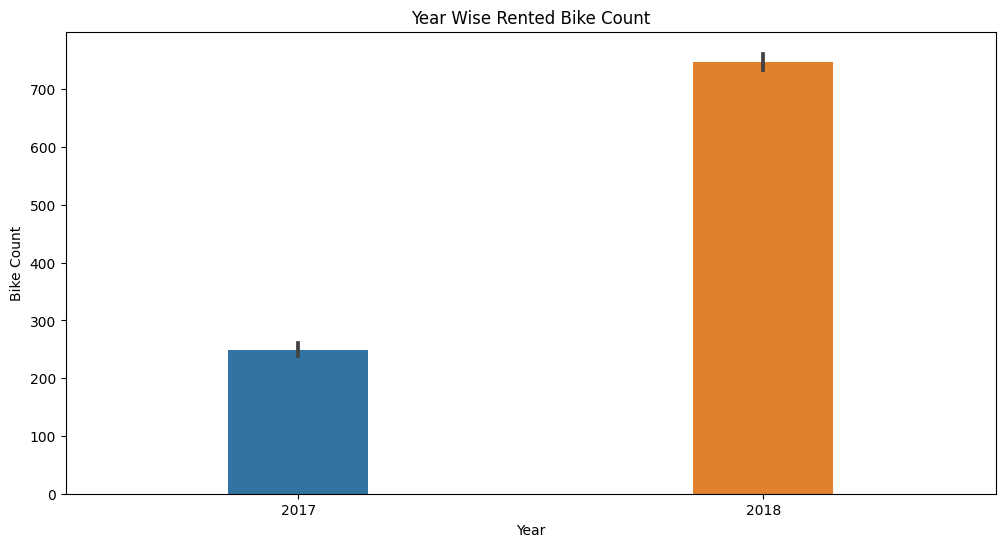

In [ ]:
bike_data['Date'].value_counts()

# Will First convert 'Date' column to datetype from object.

bike_data['Date'] = pd.to_datetime(bike_data['Date'])

# Will Extrat Year from date.

bike_data['Year']= bike_data['Date'].dt.year

# Will PLot bar plot for same now

f= plt.figure(figsize=(12,6))
sns.despine(f)
sns.barplot(x='Year',y='Rented_Bike_Count', data =bike_data,width=0.3)
plt.xlabel('Year')
plt.ylabel('Bike Count')
plt.title('Year Wise Rented Bike Count')

plt.show()

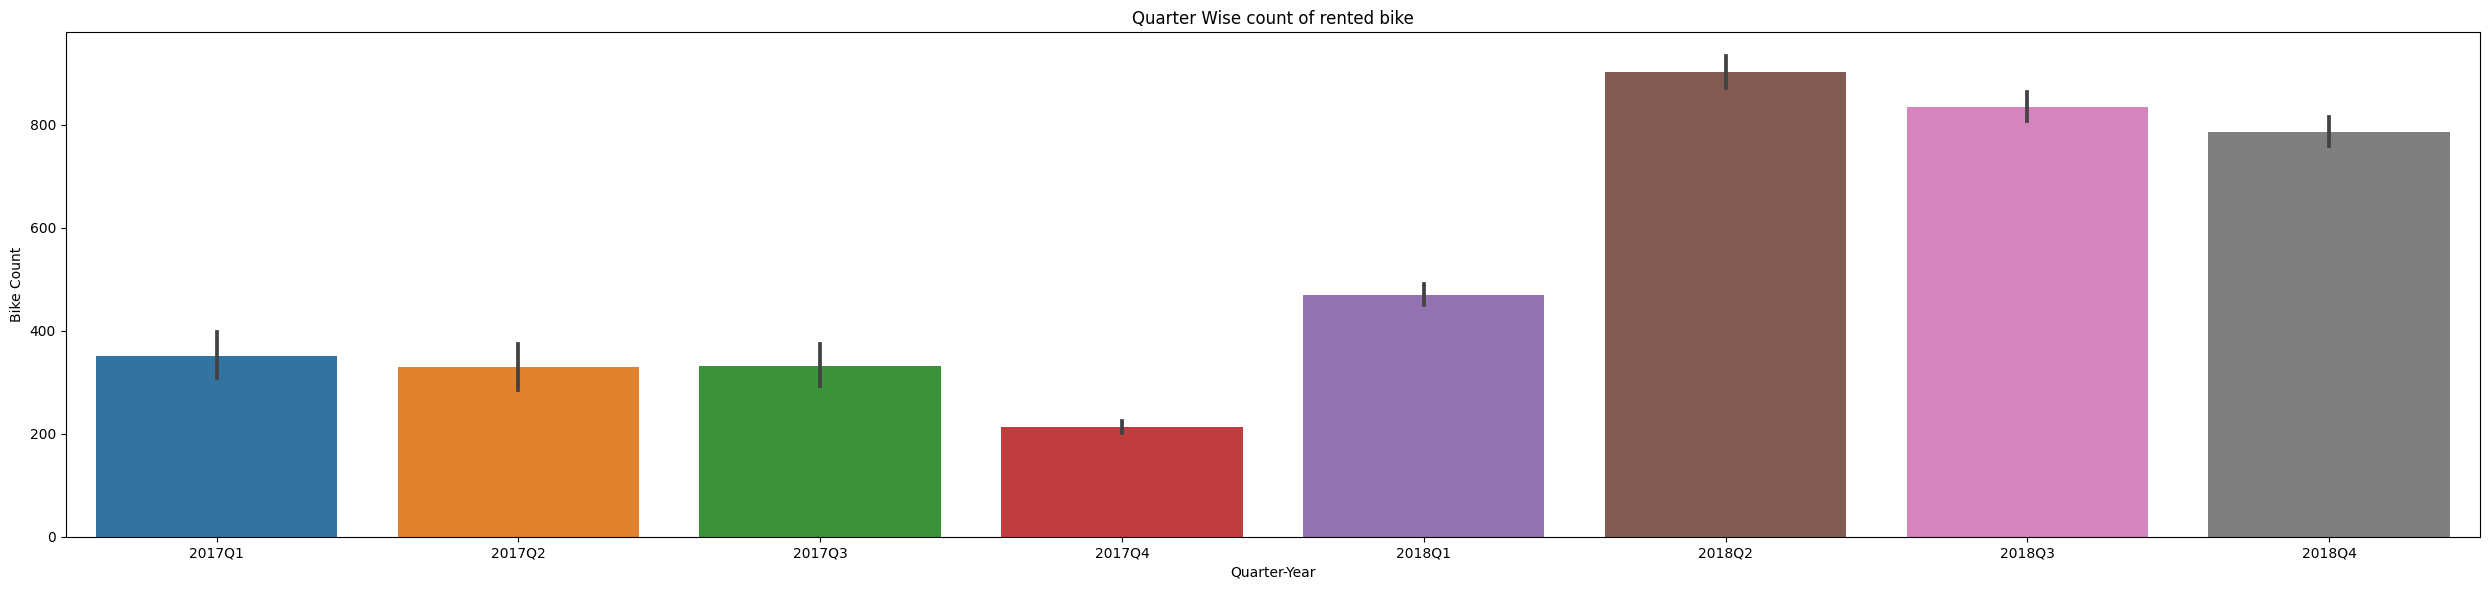

In [ ]:
# Similarly will extract Quarter from Data column

bike_data['Quarter'] = bike_data['Date'].dt.quarter
bike_data['Quarter-Year'] = bike_data['Date'].dt.to_period('Q')

f = plt.figure(figsize=(25,6))
sns.despine(f)
sns.barplot(x='Quarter-Year', y='Rented_Bike_Count', data=bike_data)
plt.xlabel('Quarter-Year')
plt.ylabel('Bike Count')
plt.title('Quarter Wise count of rented bike')

plt.tight_layout()
plt.show()

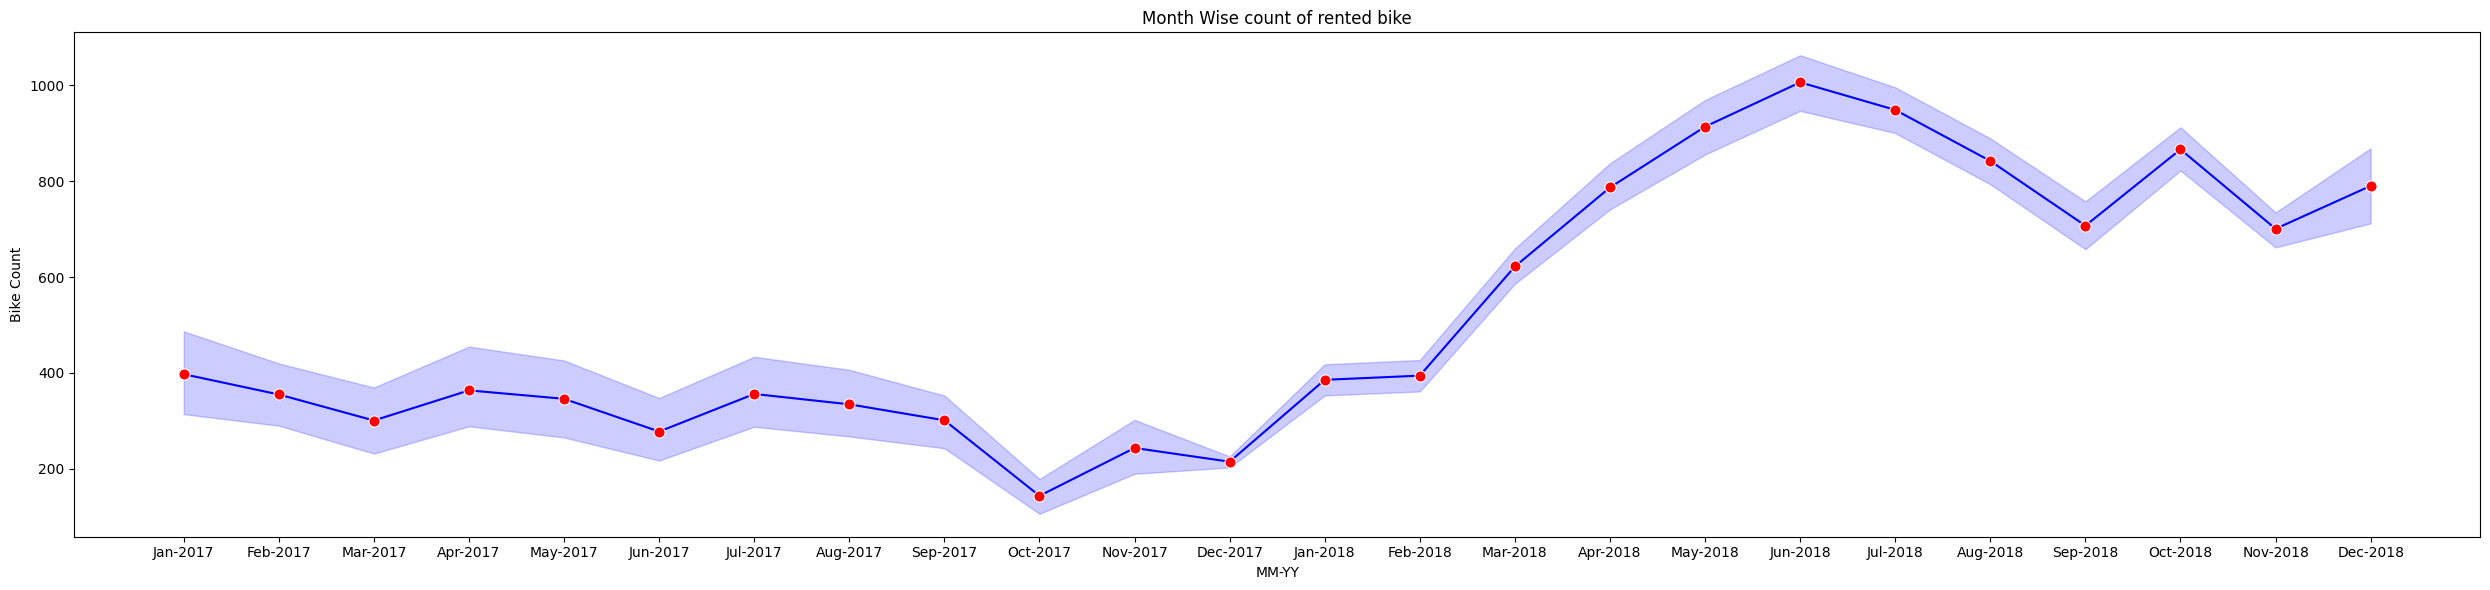

In [ ]:
# Extracting Month-Year from Date.

bike_data['Month'] = bike_data['Date'].dt.month

# Similarly Extracting Month-Year from Date

bike_data['MM-YY'] = bike_data['Date'].dt.strftime('%b-%Y')

# Ploting Line Chart for Month Wise count of rented bike


f = plt.figure(figsize=(25,6))
sns.despine(f)
sns.lineplot(x='MM-YY', y='Rented_Bike_Count', data=bike_data, marker='o',markerfacecolor='red',markersize=8,color='b')
plt.xlabel('MM-YY')
plt.ylabel('Bike Count')
plt.title('Month Wise count of rented bike')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Bar plot to visualize the year-wise rented bike count. The choice of a bar plot is determined by the requirements of the data and the type of information you want to convey.**

*   Bar plots are commonly used to display categorical data, where each bar represents a category and the height of the bar represents a numerical value
*   Bar plots are effective for comparing the values of different categories or groups, making it easy to see which years had higher or lower bike counts.



##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   **Trends Over the Years** - Steady increase in number of rented bikes each year.
*   **Peak Years**- For 2018 was good number as compaired to 2017.
*   **Peak Quarter** - For Qtr2 of 2018 were highest number of rented bikes, while for Qtr4 for 2017 were lowest numbers.
*   **Peak Month** - For June 2018 were higest numbers, while for Oct-2017 were lowest numbers.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for positive business impact:**


*   **Business opportunities:** By observing yearly/monthly/quarterly trend of rented bike count, can open for more resorces like count of bikes and bike stations, more user friendy interface.
*   **Monthly Adjustment:** By observing monthly trend we can offers some discount, some concessional offers and more to attrcat more users.



#### Chart - 2

#### Pie Chart for Holiday's

In [ ]:
bike_data.shape

(8760, 19)

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented_Bike_Count, dtype: int64


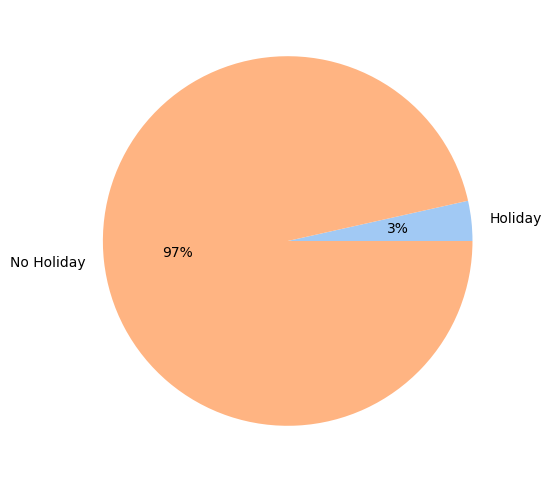

In [ ]:
from ipywidgets import Label
holiday_count = bike_data.groupby('Holiday')['Rented_Bike_Count'].sum()
print(holiday_count)
# This Data can be represented using Pie chart

plt.figure(figsize=(8,6))
sns.set_palette('pastel')
plt.pie(holiday_count,labels=holiday_count.index,autopct='%.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a pie chart, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Pie charts are excellent for showing the distribution of a whole into its parts.
*    Pie charts work well when you have a small number of categories or parts to represent.



##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   The insight is the proportion of bike rentals during holidays are highest compared to non-holidays. From above Pie plot we can say that 97% rented bike on non-holidays, while only 3% rentd on holidays.
*   From above statemen we can say, users are renting bike by their daily works, office work and for many more daily usages.
*   Holidayes are not impacting on much intend for count of rented bike.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights for positive business impact:**


*   **Resource Allocation:** By understnading trend of count of rented bike on holidays and non- holidays it will help for proper allocation of bikes on station, staff and other required stuff during peak non-holidays.
*   **Business opportunities:** Holidays holds for a relatively small portion of the pie,By analyzing these insights, the company can develop strategies to attract customers during off-peak times.



#### Chart - 3

#### Season wise count of rented bike count

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented_Bike_Count, dtype: int64


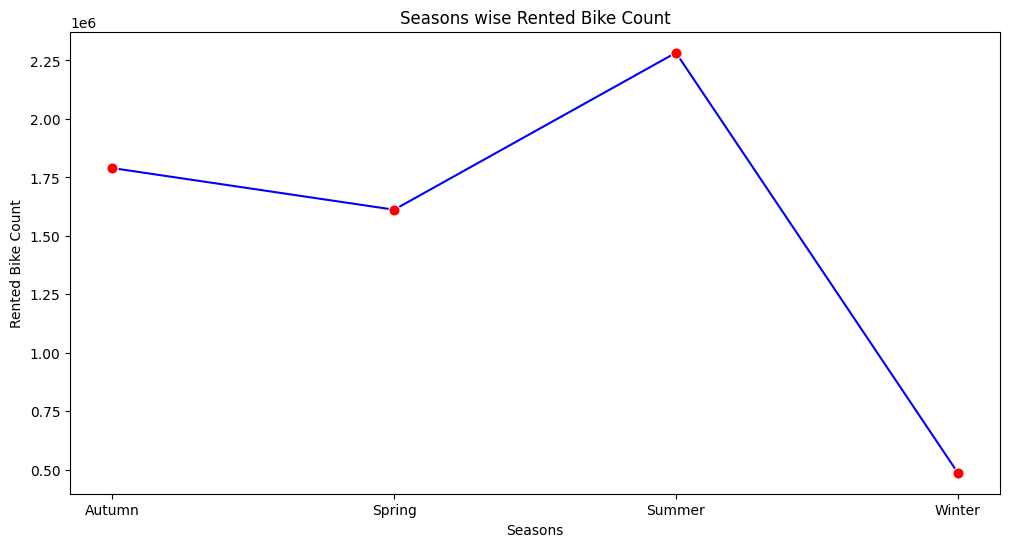

In [ ]:
# Will check for season

bike_data['Seasons'].value_counts()

Seasonwise_count = bike_data.groupby('Seasons')['Rented_Bike_Count'].sum()
print(Seasonwise_count)

plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.lineplot(y=Seasonwise_count.values, x =Seasonwise_count.index,data=Seasonwise_count,marker='o',markerfacecolor='red',markersize=8,color='b')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Seasons wise Rented Bike Count')

plt.show()

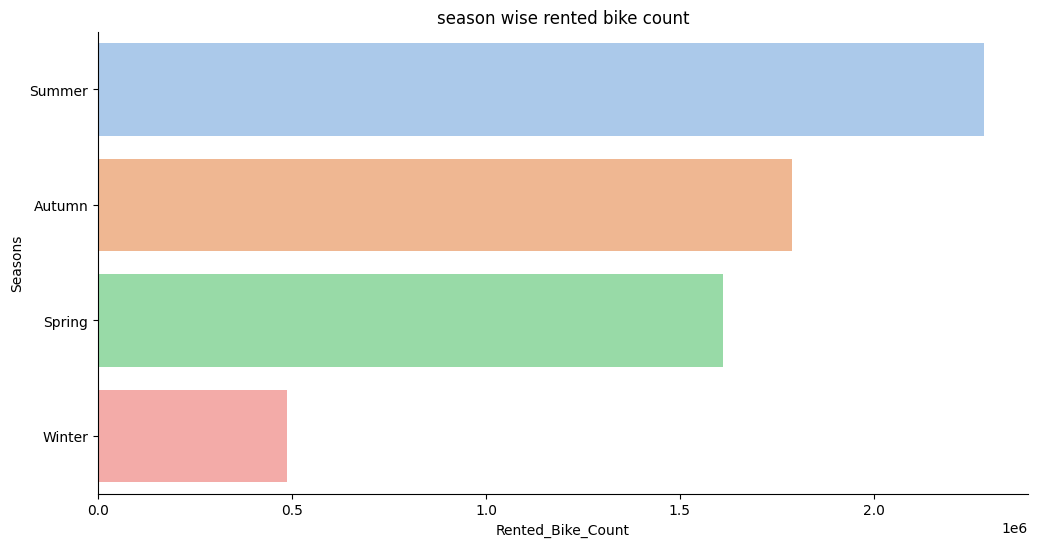

In [ ]:
# Year and season wise rented bike count

season_year = bike_data.groupby('Seasons')['Rented_Bike_Count'].sum().sort_values(ascending=False)

season_year


f,ax = plt.subplots(figsize=(12,6))
sns.despine(f)
sns.barplot(x = season_year.values, y = season_year.index ,data=bike_data,orient='h' )
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Seasons')
plt.title('season wise rented bike count')
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Line chart, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   A line chart is an excellent choice when you want to display how a numeric value, changes over time.
*    Line charts are easy to read and interpret, which is important for conveying the information clearly to the viewer.



##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   Demanded Season: From chart we can observe 'Summer'season had more number while 'winter' season had very less number of rented bike.
*   We can say users are more lying on rented bike on 'Summer' season to stay fit.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   **Resource Allocation:** By understnading trend of count of rented bike on seasons it will help for proper allocation of bikes on station, staff and other required stuff during peak seasons.
*   **Marketing  opportunities:** we can arrange for season campaing to attract more customers or users.Also can arrange for seasonal offers.

#### Chart - 4

#### Top 10 hour and rented bike count

Hour
18    548568
19    436229
17    415556
20    390172
21    376479
8     370731
16    339677
22    336821
15    302653
14    276971
Name: Rented_Bike_Count, dtype: int64


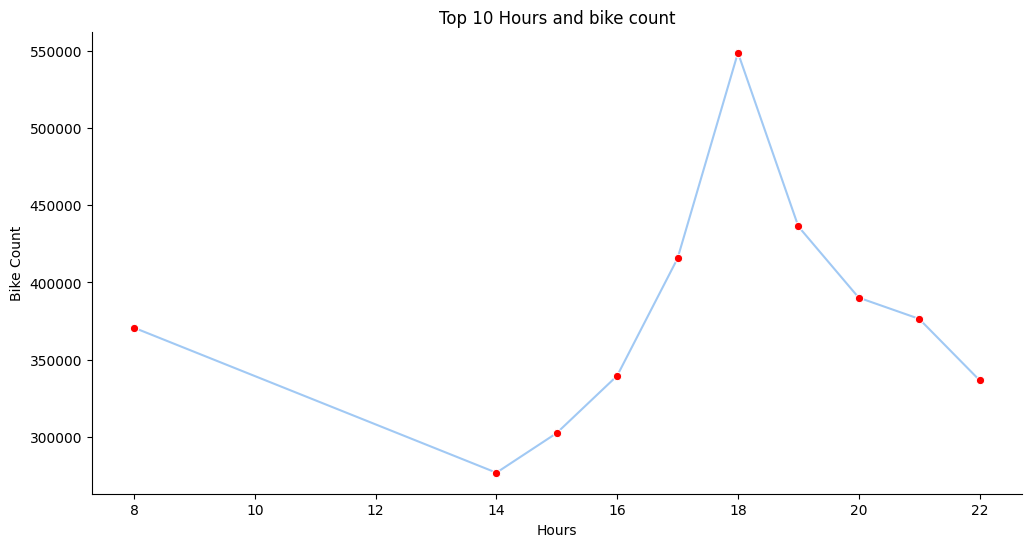

In [ ]:
hour_count = bike_data.groupby('Hour')['Rented_Bike_Count'].sum()

sorted_hour_count = hour_count.sort_values(ascending=False)

top_10_hours = sorted_hour_count.head(10)

print(top_10_hours)

# will plot line-plot for same

f,ax= plt.subplots(figsize=(12,6))
sns.despine(f)
sns.lineplot(y=top_10_hours.values,x=top_10_hours.index, data=top_10_hours,marker='o',markerfacecolor='red')
plt.xlabel('Hours')
plt.ylabel('Bike Count')
plt.title('Top 10 Hours and bike count')
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Line chart, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   A line chart is an excellent choice when you want to display how a numeric value, changes over time.
*   Line charts are easy to read and interpret, which is important for conveying the information clearly to the viewer.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   **Peak Hours:**The chart clearly identifies the top 10 hours with the highest bike rental counts. We can observe that 18th hour is peak while 14th hour is least one for rented bike count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   **Resource Allocation:** By understnading trend of count of rented bike on hours it will help for proper allocation of bikes on station, staff and other required stuff during peak hours.
*   **Marketting opportunities:** We can use this data to create targeted marketing campaigns or promotions during the identified peak hours to attract more customers.



#### Chart - 5

#### Top 10 Temprature and Humedities and its bike rented count

(This Graph is for more information only)

Temperature(°C)
23.4    45078
24.2    42243
25.0    39936
19.1    38835
20.6    38398
28.2    36940
27.8    35979
24.6    35858
20.7    35562
22.2    35478
27.9    35265
24.0    34798
20.5    34621
20.1    34480
22.7    34414
22.6    34335
24.4    34307
21.6    34265
25.7    33744
16.9    33568
Name: Rented_Bike_Count, dtype: int64
Humidity
43    141773
53    140725
47    138105
56    134711
51    131966
52    130054
55    129240
44    126969
45    126234
54    123762
63    121066
50    119581
60    118913
48    118730
57    118350
46    114084
64    112588
49    112325
58    108892
34    107389
Name: Rented_Bike_Count, dtype: int64


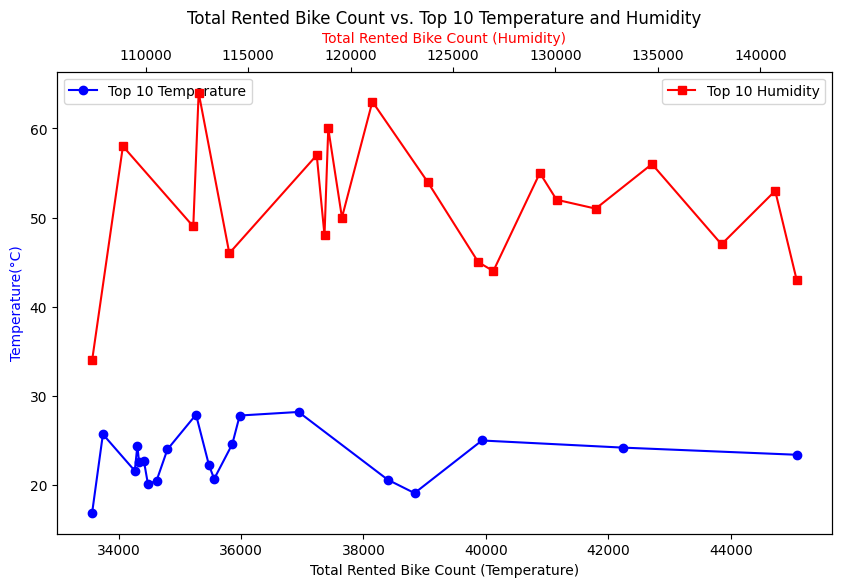

In [ ]:
Temp_count = bike_data.groupby('Temperature(°C)')['Rented_Bike_Count'].sum()

sorted_temp_count = Temp_count.sort_values(ascending=False)

Top_10_sorted_temp_count = sorted_temp_count.head(20)

print(Top_10_sorted_temp_count)

# sililarly for Humedities

humedity_count = bike_data.groupby('Humidity')['Rented_Bike_Count'].sum()

sorted_humedity_count= humedity_count.sort_values(ascending=False)

Top_10_sorted_humedity_count = sorted_humedity_count.head(20)

print(Top_10_sorted_humedity_count)


# Will plot chart

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(Top_10_sorted_temp_count.values, Top_10_sorted_temp_count.index, label='Top 10 Temperature', color='blue', marker='o')
ax1.set_xlabel('Total Rented Bike Count (Temperature)')
ax1.set_ylabel('Temperature(°C)', color='blue')
ax2 = ax1.twiny()

ax2.plot(Top_10_sorted_humedity_count.values, Top_10_sorted_humedity_count.index, label='Top 10 Humidity', color='red', marker='s')
ax2.set_xlabel('Total Rented Bike Count (Humidity)', color='red')

plt.title('Total Rented Bike Count vs. Top 10 Temperature and Humidity')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')



plt.show()

#### Chart - 6

#### Rainfall and snowfall vs. Rented bike count

(This Graph is for more information only)

Rainfall
0.0    6086009
0.5      28604
0.1      15179
1.0       8419
1.5       5686
2.0       3916
0.2       3706
4.0       3128
0.4       2147
3.5       1984
Name: Rented_Bike_Count, dtype: int64
Snowfall
0.0    6090314
0.3       8304
1.0       6357
0.4       5981
0.8       5632
0.7       5108
0.9       4854
0.5       4716
2.0       4191
2.2       3813
Name: Rented_Bike_Count, dtype: int64


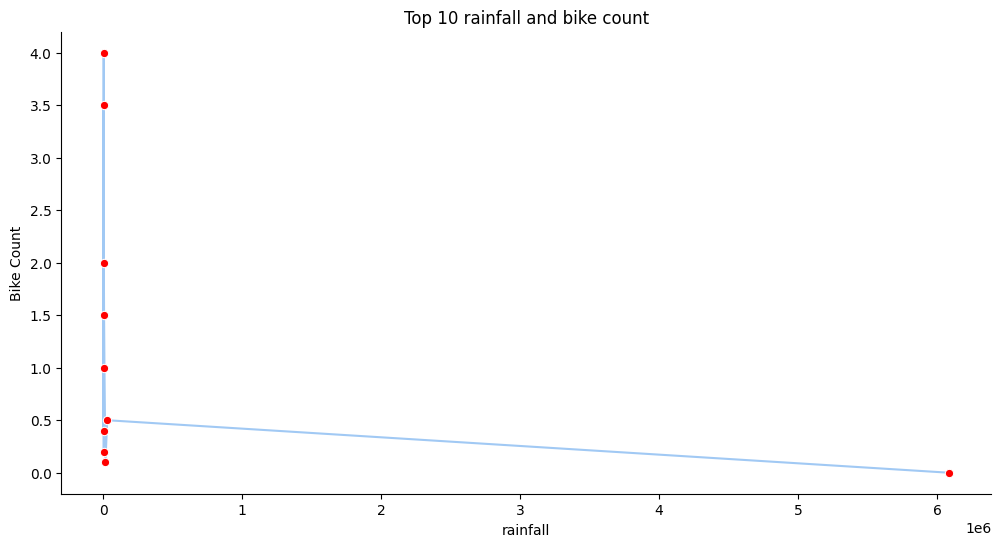

In [ ]:
# For rainfall

rainfall_count = bike_data.groupby('Rainfall')['Rented_Bike_Count'].sum()

sorted_rainfall_count = rainfall_count.sort_values(ascending=False)

top_10_sorted_rainfall_count = sorted_rainfall_count.head(10)

print(top_10_sorted_rainfall_count)

# For Snowfall

snowfall_count = bike_data.groupby('Snowfall')['Rented_Bike_Count'].sum()

sorted_snowfall_count = snowfall_count.sort_values(ascending=False)

top10_sorted_snowfall_count = sorted_snowfall_count.head(10)

print(top10_sorted_snowfall_count)

# Will plot chart

f,ax= plt.subplots(figsize=(12,6))
sns.despine(f)
sns.lineplot(x=top_10_sorted_rainfall_count.values,y=top_10_sorted_rainfall_count.index, data=top_10_sorted_rainfall_count,marker='o',markerfacecolor='red')
plt.xlabel('rainfall')
plt.ylabel('Bike Count')
plt.title('Top 10 rainfall and bike count')
plt.show()

#### Chart - 7

#### KDE plot For all columns

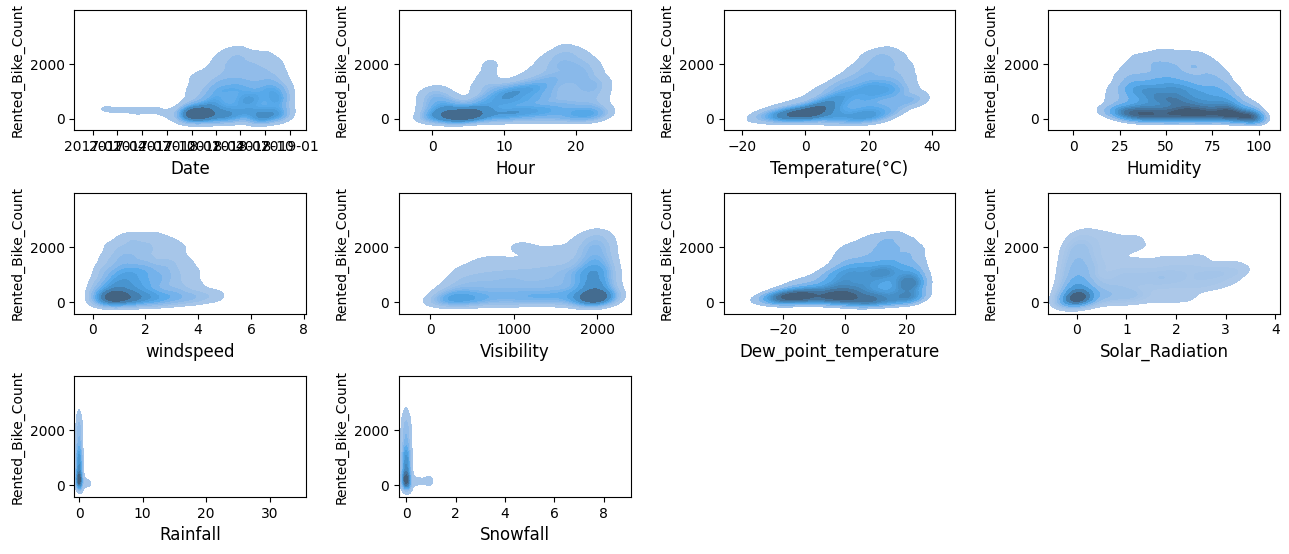

In [ ]:
num_columns = bike_data[['Date','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]

plt.figure(figsize=(13, 7))
plotnumber = 1

for column in num_columns.columns:
    if plotnumber <= 16:
        plt.subplot(4, 4, plotnumber)
        sns.kdeplot(data=bike_data, x=column, y='Rented_Bike_Count', shade=True)
        plt.xlabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a KDE Plot, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   KDE plots are useful for visualizing the distribution of data.
*   KDE plot provide a smoothed estimate of the probability density function, making it easier to understand the shape of the data distribution.
*   KDE plots are typically used for numerical variables.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   **Data Distribution-** From this chart we can observe that, data point distribution of all numerical columns againt rented bike count.For variables like 'Date','Hour','Temprature','Humedity','Visibility' plot is spreded in equally, that means they are directly proportional to each others.
*   **Trends and Patterns-** Similarly, we can observe for trends and patterns like 'Temperature(°C)' has a strong positive effect on 'Rented Bike Count' up to a certain temperature and vice versa for 'Rainfall' and 'Snowfall'.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   **Correlation-** By identifying strong psitive coorelaions the company can focus marketing efforts on sunny days or adjust bike rental pricing during different temperature ranges to optimize increase in count of rented bikes.
*   **Resource Allocation-** By understnading trend of count of rented bike on various aspects it will help for proper allocation of bikes on station, staff and other required stuff during seasons, perticular tempraturs, rainfalls and snowfalls, hours.



In [ ]:
num_columns = bike_data[['Date','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]

print(num_columns)

           Date  Hour  Temperature(°C)  Humidity  windspeed  Visibility  \
0    2017-01-12     0             -5.2        37        2.2        2000   
1    2017-01-12     1             -5.5        38        0.8        2000   
2    2017-01-12     2             -6.0        39        1.0        2000   
3    2017-01-12     3             -6.2        40        0.9        2000   
4    2017-01-12     4             -6.0        36        2.3        2000   
...         ...   ...              ...       ...        ...         ...   
8755 2018-11-30    19              4.2        34        2.6        1894   
8756 2018-11-30    20              3.4        37        2.3        2000   
8757 2018-11-30    21              2.6        39        0.3        1968   
8758 2018-11-30    22              2.1        41        1.0        1859   
8759 2018-11-30    23              1.9        43        1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6     

#### Chart - 8

#### Scatter Plot

(For easy understand divided in 3 parts)

<Axes: xlabel='windspeed', ylabel='Rented_Bike_Count'>

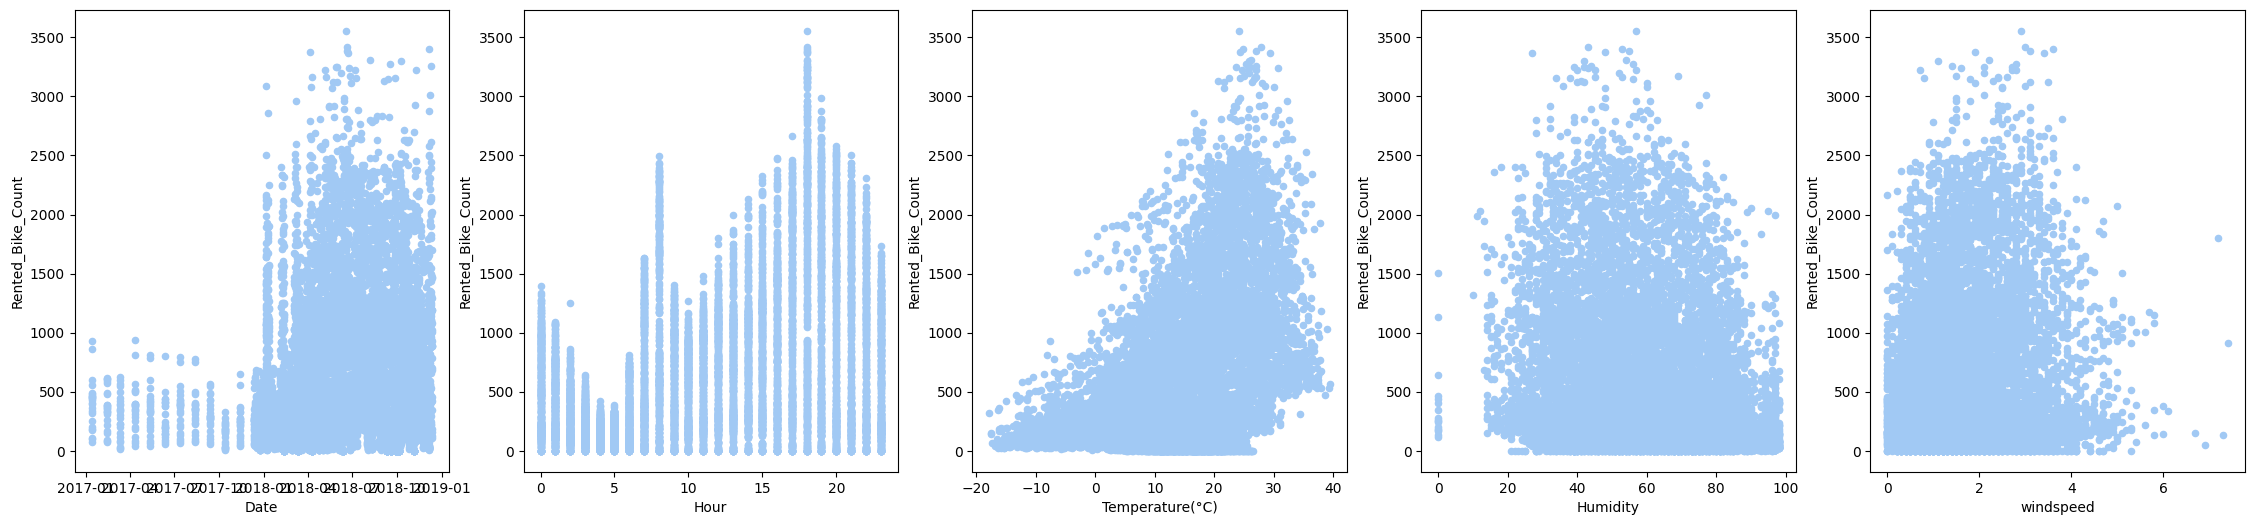

In [ ]:
# Part 1

fig,axs = plt.subplots(1,5)

bike_data.plot(kind='scatter',x='Date',y='Rented_Bike_Count',ax=axs[0],figsize=(28,6))

bike_data.plot(kind='scatter',x='Hour',y='Rented_Bike_Count',ax=axs[1],figsize=(28,6))

bike_data.plot(kind='scatter',x='Temperature(°C)',y='Rented_Bike_Count',ax=axs[2],figsize=(28,6))

bike_data.plot(kind='scatter',x='Humidity',y='Rented_Bike_Count',ax=axs[3],figsize=(28,6))

bike_data.plot(kind='scatter',x='windspeed',y='Rented_Bike_Count',ax=axs[4],figsize=(28,6))

<Axes: xlabel='Snowfall', ylabel='Rented_Bike_Count'>

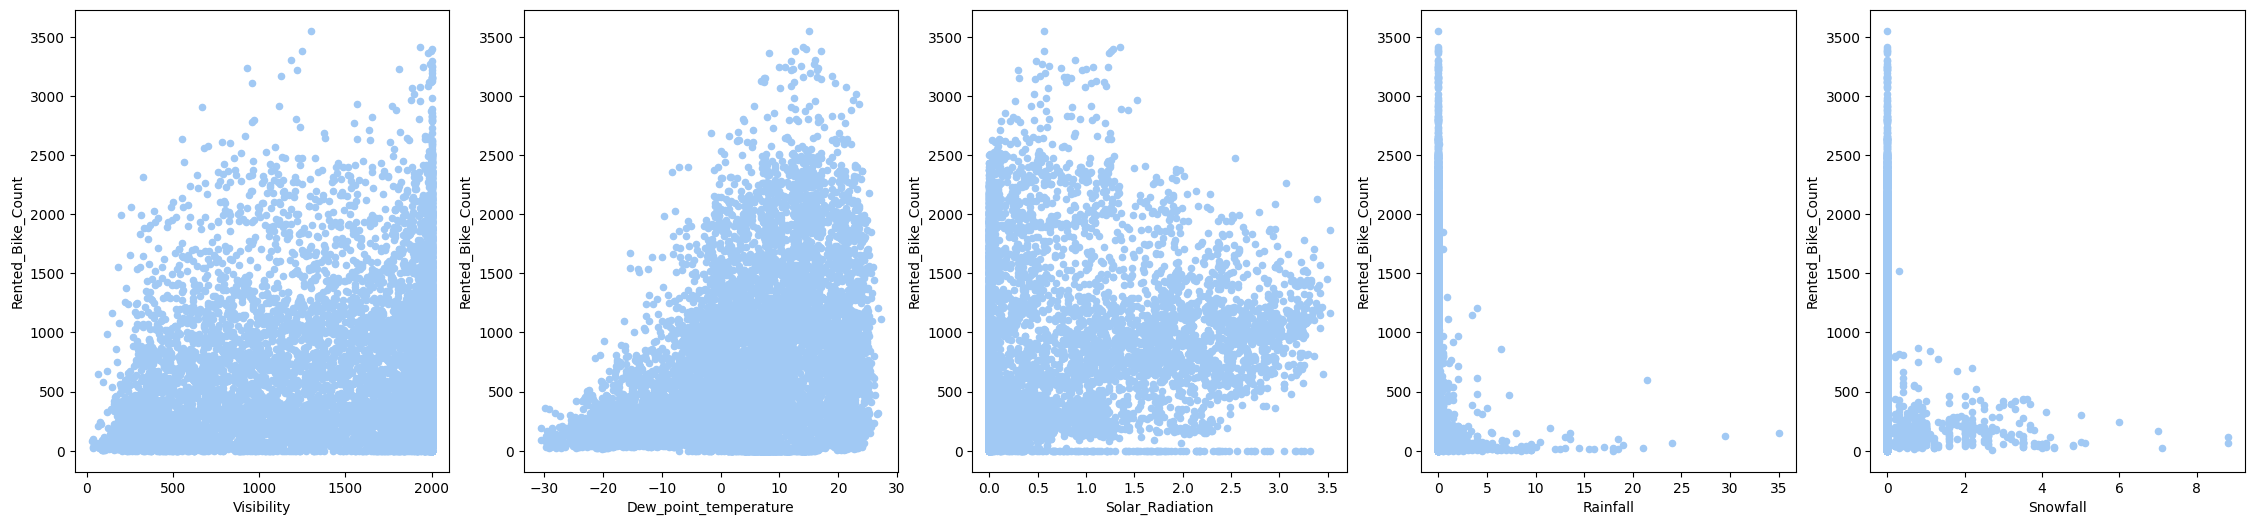

In [ ]:
# Part 2

fig,axs = plt.subplots(1,5)

bike_data.plot(kind='scatter',x='Visibility',y='Rented_Bike_Count',ax=axs[0],figsize=(28,6))

bike_data.plot(kind='scatter',x='Dew_point_temperature',y='Rented_Bike_Count',ax=axs[1],figsize=(28,6))

bike_data.plot(kind='scatter',x='Solar_Radiation',y='Rented_Bike_Count',ax=axs[2],figsize=(28,6))

bike_data.plot(kind='scatter',x='Rainfall',y='Rented_Bike_Count',ax=axs[3],figsize=(28,6))

bike_data.plot(kind='scatter',x='Snowfall',y='Rented_Bike_Count',ax=axs[4],figsize=(28,6))


<Axes: xlabel='Functioning_Day', ylabel='Rented_Bike_Count'>

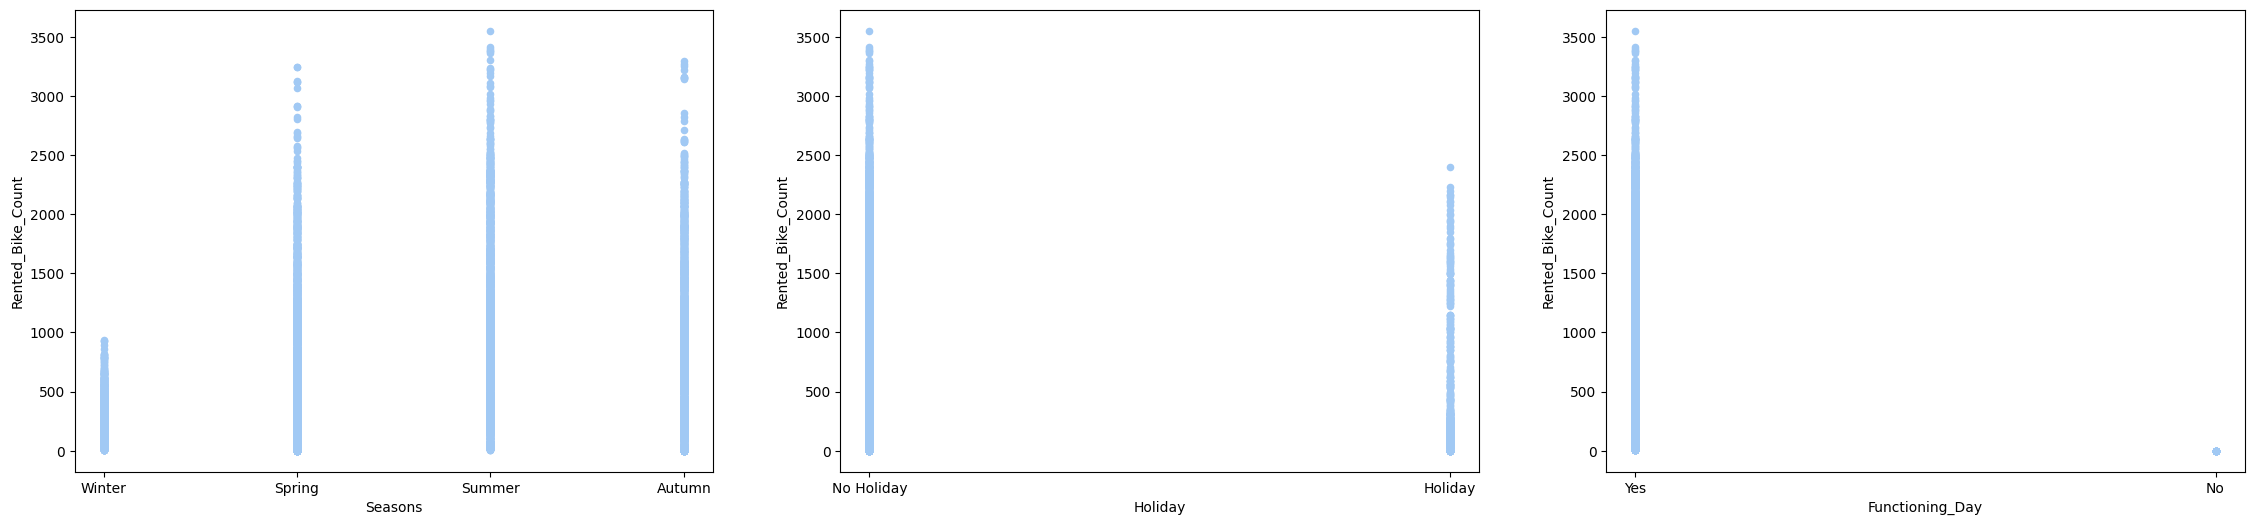

In [ ]:
# Part 3

fig,axs = plt.subplots(1,3)

bike_data.plot(kind='scatter',x='Seasons',y='Rented_Bike_Count',ax=axs[0],figsize=(28,6))

bike_data.plot(kind='scatter',x='Holiday',y='Rented_Bike_Count',ax=axs[1],figsize=(28,6))

bike_data.plot(kind='scatter',x='Functioning_Day',y='Rented_Bike_Count',ax=axs[2],figsize=(28,6))


##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Scatter Plot, and it was selected as based on the nature of the data and the information that needed to be conveyed.**

*   Scatter plots are effective for comparing two continuous variables
*   Scater plot allows o see how changes in one variable corrospond to change in anoher.
*   Scatter plots make it easy to spot outliers.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**

#### For Numerical Variables

*   **'Date'vs.'Rented Bike Count':** Yearly/Monthly/quarterly seems like positive trend means rented bike count inreacsing Yearly/Monthly/quarterly.
*   **'Hour'vs.'Rented Bike Count':** we can observe for perticular hour there was peak for rented bike count and for some of hours there was lower count.
*   **'Temperature(°C)'vs.'Rented Bike Count':**There is a positive correlation between temperature and bike rentals. More bikes are rented as the temperature rises.
*   **'Humidity(%)' vs. 'Rented Bike Count':**Bike rentals seems to decrease as humidity levels increase. The most bike rentals occur on days with humidity levels between 30% and 60%, and rentals decrease significantly on very humidity days.
*   **'Wind speed (m/s)' vs. 'Rented Bike Count':**Bike rentals show a slight negative correlation with wind speed. Rentals tend to be highest on days with low to moderate wind speeds, while very windy days have lower bike rental counts.
*   **Visibility vs. Rented Bike Count:** Visibility shows shows slight upwads sloping trend so,  visibility increases, the number of rented bikes tends to increase.indicating that more visibility might for more bike rentals.
*   **Dew Point Temperature vs. Rented Bike Count:** An upward trend indicate that as the dew point temperature increases, bike rentals tend to increase.
*   **Solar Radiation vs. Rented Bike Count:** The positive trend, indicate that as solar radiation increases, bike rentals increase. So, as more solar radiation typically indicates sunnier and warmer days.
*   **Rainfall vs. Rented Bike Count:** A negative trend indicates that as rainfall increases, bike rentals tend to decrease.
*   **Snowfall vs. Rented Bike Count:** A negative trend indicates that as Snowfall increases, bike rentals tend to decrease.

#### For Non-Numerical Variables

*   **'Seasons' vs. 'Rented Bike Count':** Shows Season wise rented bike counts 'Winter' season have very less rented bike cound, while 'Summer' season have highest number of count.

*   **'Holiday' vs. 'Rented Bike Count':** Bike rented count for Functioning Day is more than non-Functioning Day.
*   **'Functioning Day' vs. 'Rented Bike Count':** Bike rented count for non-holidays is more than holidays counts.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   **Correlation-** By identifying strong psitive coorelaions the company can focus marketing efforts on sunny days or adjust bike rental pricing during different temperature ranges to optimize increase in count of rented bikes.
*   **Resource Allocation-** By understnading trend of count of rented bike on various aspects it will help for proper allocation of bikes on station, staff and other required stuff during seasons, perticular tempraturs, rainfalls and snowfalls, hours.



#### Chart - 9

#### Distribution plot

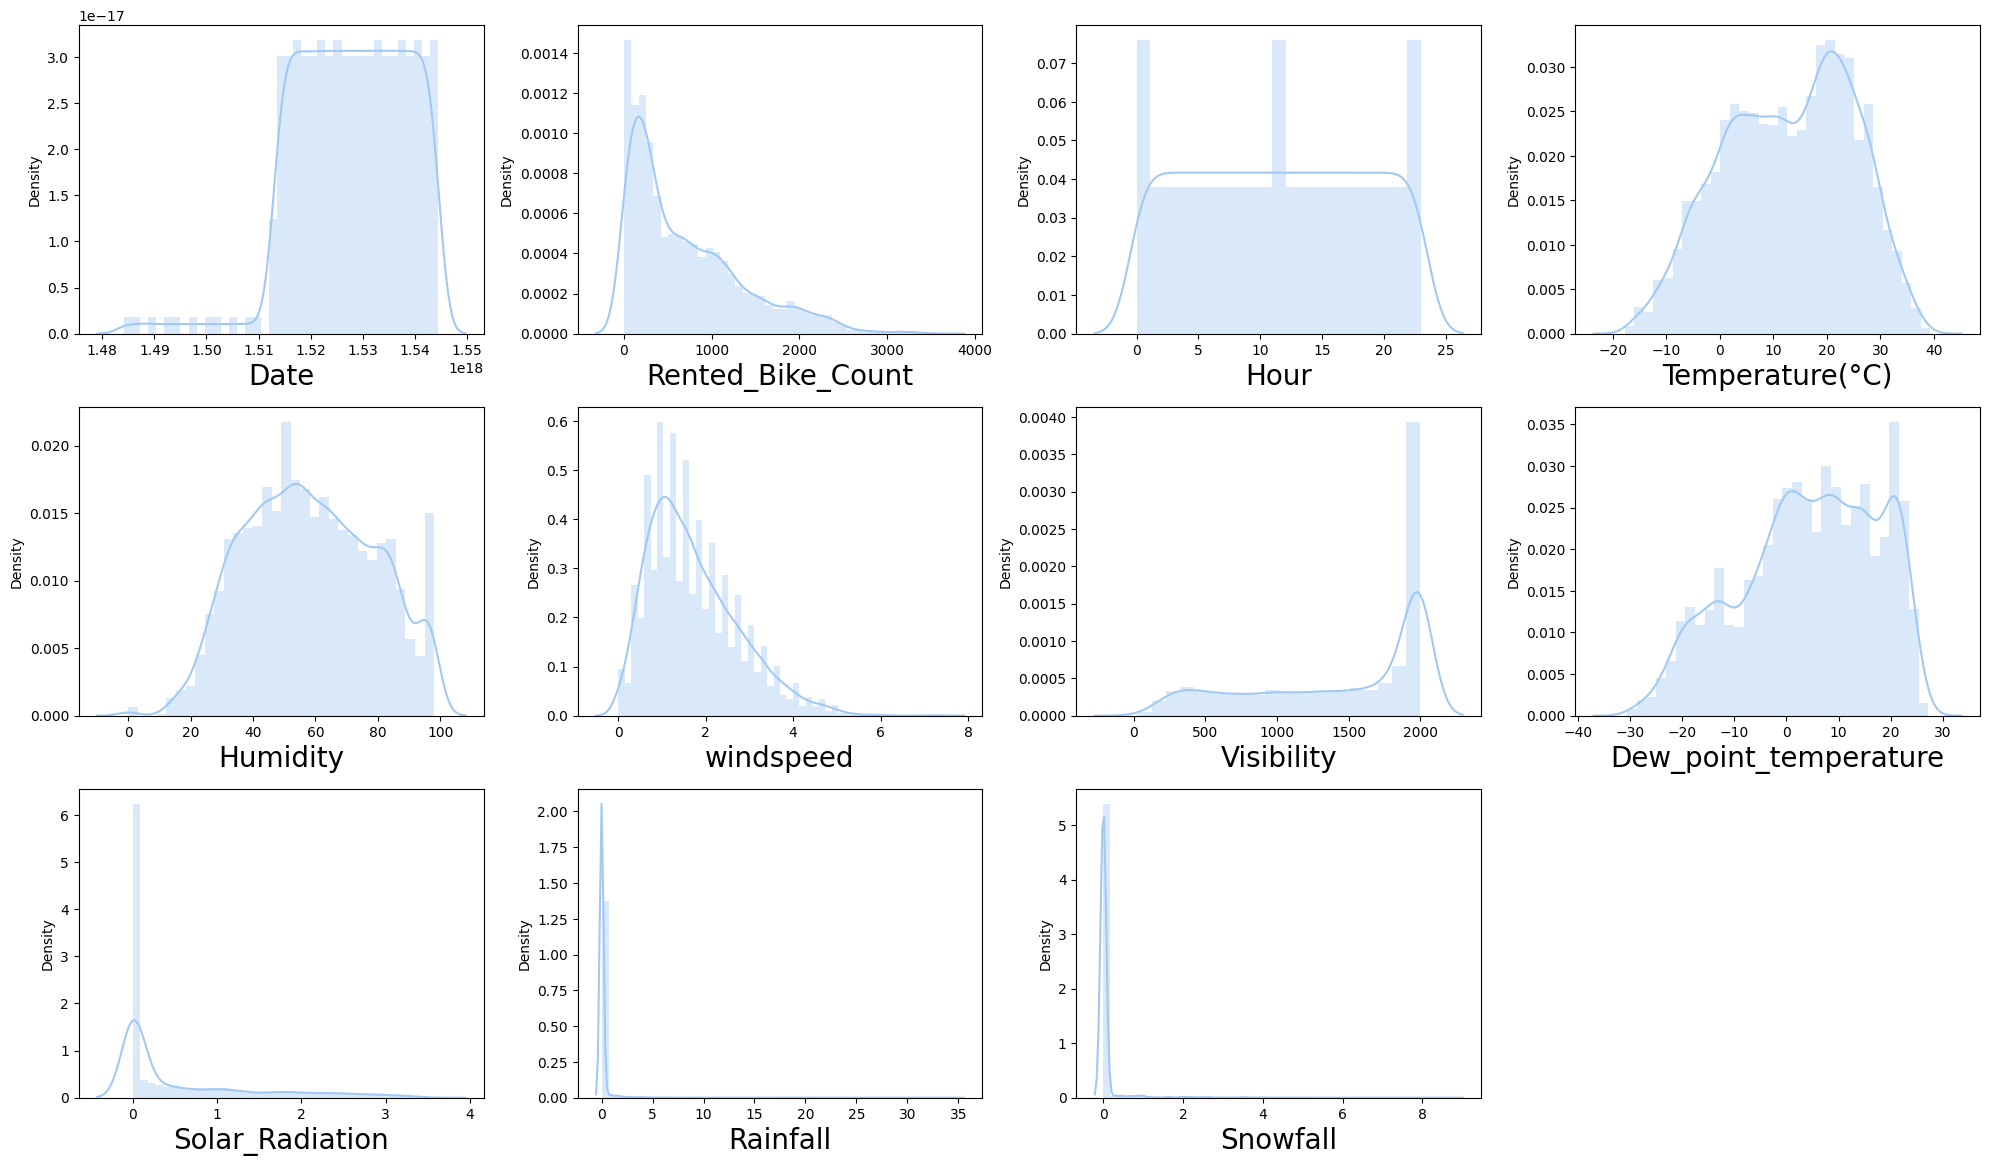

In [ ]:
num_columns = bike_data[['Date','Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall']]


plt.figure(figsize=(20,15))
plotnumber=1

for column in num_columns:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(num_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Scatter Plot, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Histograms are particularly effective for visualizing the distribution of continuous data.
*   A histogram provides information about the density of data points within various value ranges.
*   Histograms allow you to see the range of values within a dataset, including the presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**


*   Can observe that  'Temperature(°C)' column is normally distributed, while the 'Rainfall(mm)' and 'Snowfall(Cm)' column is positively skewed.
*   Can observe that distribution of rental counts over different hours of the day. This indicates that for certain hour most bike rentals occur and whether there are variations by time of day.
*   Can observe pattern for 'Humidity(%)','Wind speed (m/s)','Visibility (10m)',
'Dew Point Temperature(°C)','Solar Radiation (MJ/m2)' we can identify for each variable there perticular peak and lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
*   **Peak Rental Hours:** Identifying peak rental hours could allow the business to allocate resources more efficiently during those times, ensuring there are enough bikes available and additional staff.
*   **Temperature Patterns:** Understanding temperature patterns can help the business prepare with respect to various temperature in demand.
*   **Low Visibility:** Understanding low visibility conditions can lead to increased safety measures, such as providing reflective gear or safety warnings for riders.
*   **Optimal Solar Radiation:** Understanding the impact of solar radiation on rentals could help the business promote bike rentals on sunny days

#### Chart - 10

#### Correlation Graph

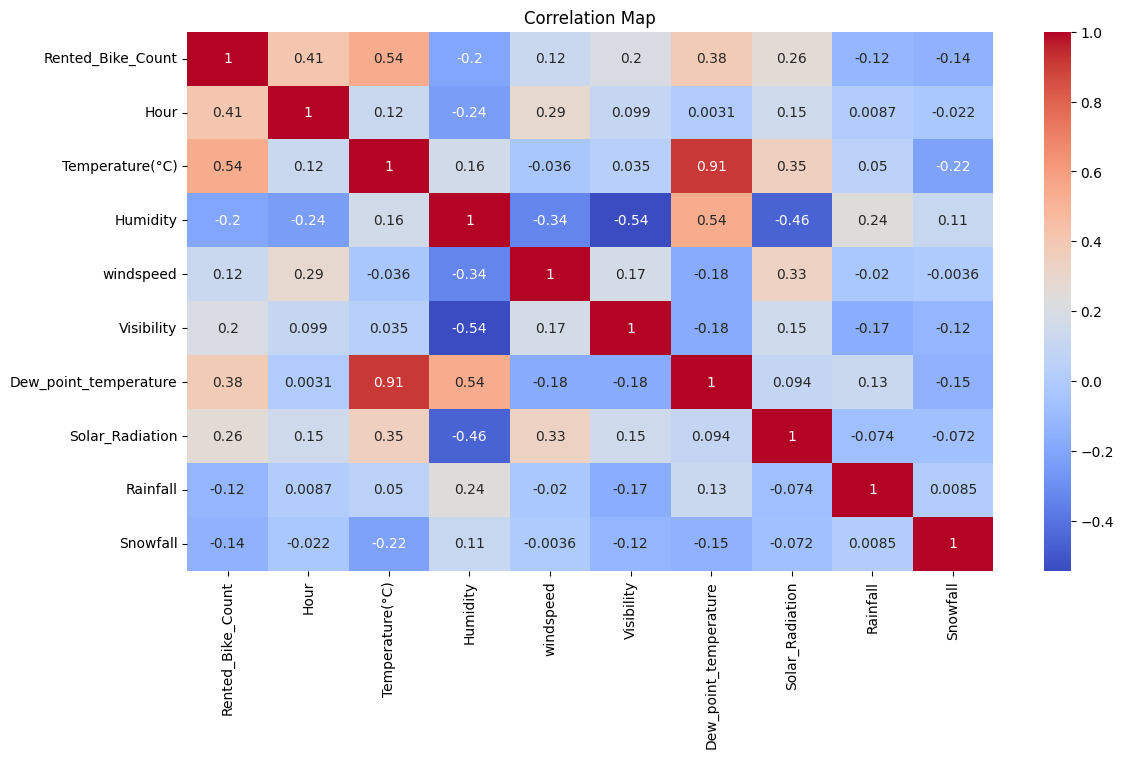

In [ ]:
numerical_cols = ['Date','Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall']

correlation_data = bike_data[numerical_cols]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(13,7))

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Correlation Heatmap, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   A correlation heatmap is particularly useful for visualizing the relationships between numerical variables.It provides a quick and intuitive way to understand how variables are related to each other.
*   A correlation heatmap displays the pairwise correlation coefficients between all combinations of numerical columns in the dataset.
*   A correlation heatmap providing quantitative information about the strength and direction of the correlations.

##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**
*    'Temperature(°C)' and 'Solar Radiation (MJ/m2)' have a strong positive correlation.It indicates that as temperature increases, solar radiation tends to increase.
*    'Temperature(°C)' and 'Rainfall(mm)' have a strong negative correlation.It
indicates that as temperature increases, the amount of rainfall tends to decrease.
*    'Temperature(°C)' and 'Snowfall(Cm)' have a strong negative correlation.It
indicates that as temperature increases, the amount of Snowfall tends to decrease.
*   'Rainfall(mm)' and 'Wind speed (m/s)' show a correlation it indicates that changes in wind speed are not strongly related to changes in rainfall.
*    'Hour' and 'Temperature(°C)' have high positive correlations with 'Rented Bike Count,' it indicates that these factors strongly affects bike rentals.

*   'Temperature(°C)' and 'Dew_point_temperature' show a very strong corelation it indicated that change in temperature will also change in Dew_point_temperature.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   **Correlation-** By identifying strong psitive coorelaions the company can focus marketing efforts on sunny days or adjust bike rental pricing during different temperature ranges to optimize increase in count of rented bikes.
*   **Resource Allocation-** By understnading trend of count of rented bike on various aspects it will help for proper allocation of bikes on station, staff and other required stuff during seasons, perticular tempraturs, rainfalls and snowfalls, hours.

#### Chart - 11

#### Box Plot

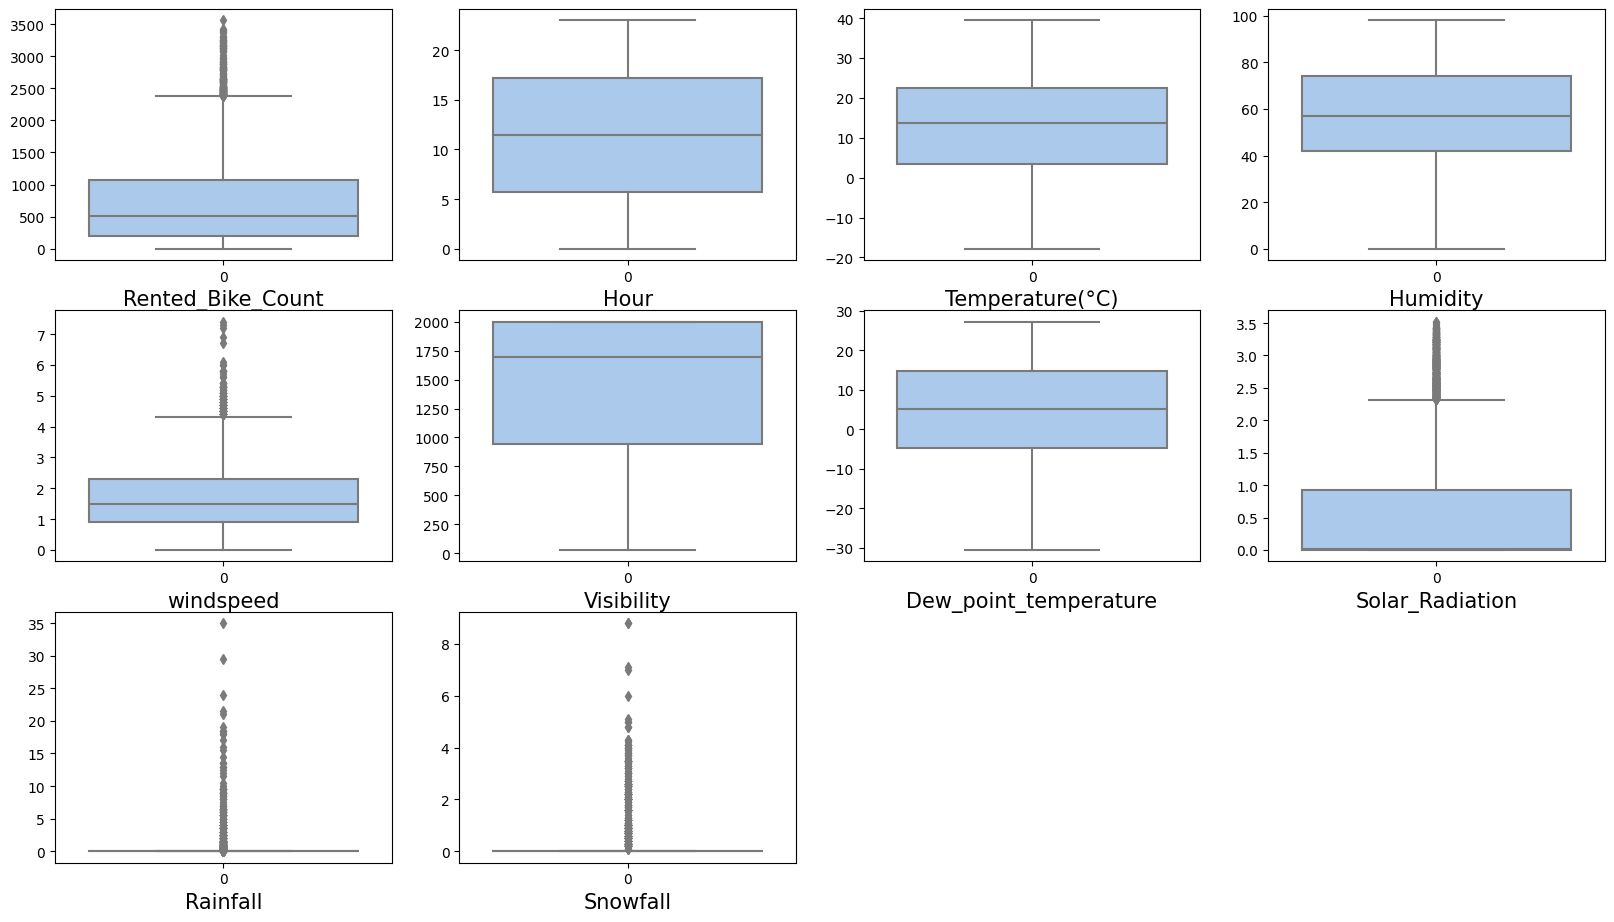

In [ ]:
num_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall']]

plt.figure(figsize=(20,15))
graph = 1

for column in num_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= num_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

##### 1. Why did you pick the specific chart?

**The specific chart chosen in this code is a Correlation Heatmap, and it was selected as based on the nature of the data and the information that needed to be conveyed.**
*   Box plots are excellent for visualizing the distribution of numerical data. They provide a summary of key statistics, such as the median, quartiles, and any potential outliers in a dataset.
*   Box plots are effective for identifying outliers, which are data points that significantly deviate from the majority of the data.



##### 2. What is/are the insight(s) found from the chart?

**Insighs from chart as below:-**
*   Median for 'Rented Bike Count' is highest at a specific hour, it indicates that a peak usage time. Similarly, if the median for 'Temperature(°C)' is higher in a certain range, it indicates a preferred temperature for bike rentals.
*   There are numerous outliers in 'Rainfall(mm)','Snowfall(Cm)' on certain days, it may indicate a heavy rain and Snow event that affects bike rentals.
*    'Hour' and 'Rented Bike Count' to see if there's a time of day when bike rentals are consistently higher or lower.
*   'Temperature(°C)' and 'Rented Bike Count' would indicate that higher temperatures are associated with more rentals.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

In [ ]:
bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,windspeed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Quarter,Quarter-Year,Month,MM-YY
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,2017Q1,1,Jan-2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,2017Q1,1,Jan-2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,2017Q1,1,Jan-2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,2017Q1,1,Jan-2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,2017Q1,1,Jan-2017


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**HO-** No Difference in the number of rented bikes on rainy days compared to non-rainy days.

**H1-** Significant difference in the number of rented bikes on rainy days.

#### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

rainy_days = bike_data[bike_data['Rainfall']>0]
non_rainy_days = bike_data[bike_data['Rainfall']==0]

# Importing necessary library

from scipy import stats

# t-test

t_stat, p_value = stats.ttest_ind(rainy_days['Rented_Bike_Count'], non_rainy_days['Rented_Bike_Count'])


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of rented bikes on rainy days.")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis: There is a significant difference in the number of rented bikes on rainy days.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**HO-** No correlation between solar radiation and the number of rented bikes.

**H1-** Significant correlation between higher solar radiation levels and increased bike rentals.

#### Perform an appropriate statistical test.

In [ ]:
correlation_coefficient, p_value = stats.pearsonr(bike_data['Solar_Radiation'], bike_data['Rented_Bike_Count'])

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of rented bikes on Solar_Radiation.")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis: There is a significant difference in the number of rented bikes on Solar_Radiation.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**HO-** No difference in the number of rented bikes on clear days compared to days with low visibility.

**H1-** Significant difference in the number of rented bikes on clear days.

#### Perform an appropriate statistical test.

In [ ]:
bike_data['Visibility'].max()

bike_data['Visibility'].min()

clear_visibiity = bike_data[bike_data['Visibility'] > 100]  # Set 'threshold' to define what constitutes a clear day
low_visibility = bike_data[bike_data['Visibility'] <= 40]

t_stat, p_value = stats.ttest_ind(clear_visibiity['Rented_Bike_Count'], low_visibility['Rented_Bike_Count'])

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the number of rented bikes on clear days.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis: There is a significant difference in the number of rented bikes on clear days.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
bike_data.isnull().sum()

print(bike_data.isnull().sum())

bike_data.duplicated()

print(bike_data.duplicated())

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature(°C)          0
Humidity                 0
windspeed                0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Year                     0
Quarter                  0
Quarter-Year             0
Month                    0
MM-YY                    0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool


**We can observe that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.**

**We found that there is no duplicate entry in the above data**

## **Before Implimentation of ML model tried to do experiment that,**
1.   Implementing ML model will all variables.(Present Numerical Variable)
2.   Implementing ML model without treating for outliers.
3.   Implementing ML model with treating for outliers.
4.   Implementing ML model with selecting perticular variables which are more correlated with Y variable.

## ***7. ML Model Implementation***

### ML Model - 1

(6132, 12)
(2628, 12)
(6132,)
(2628,)


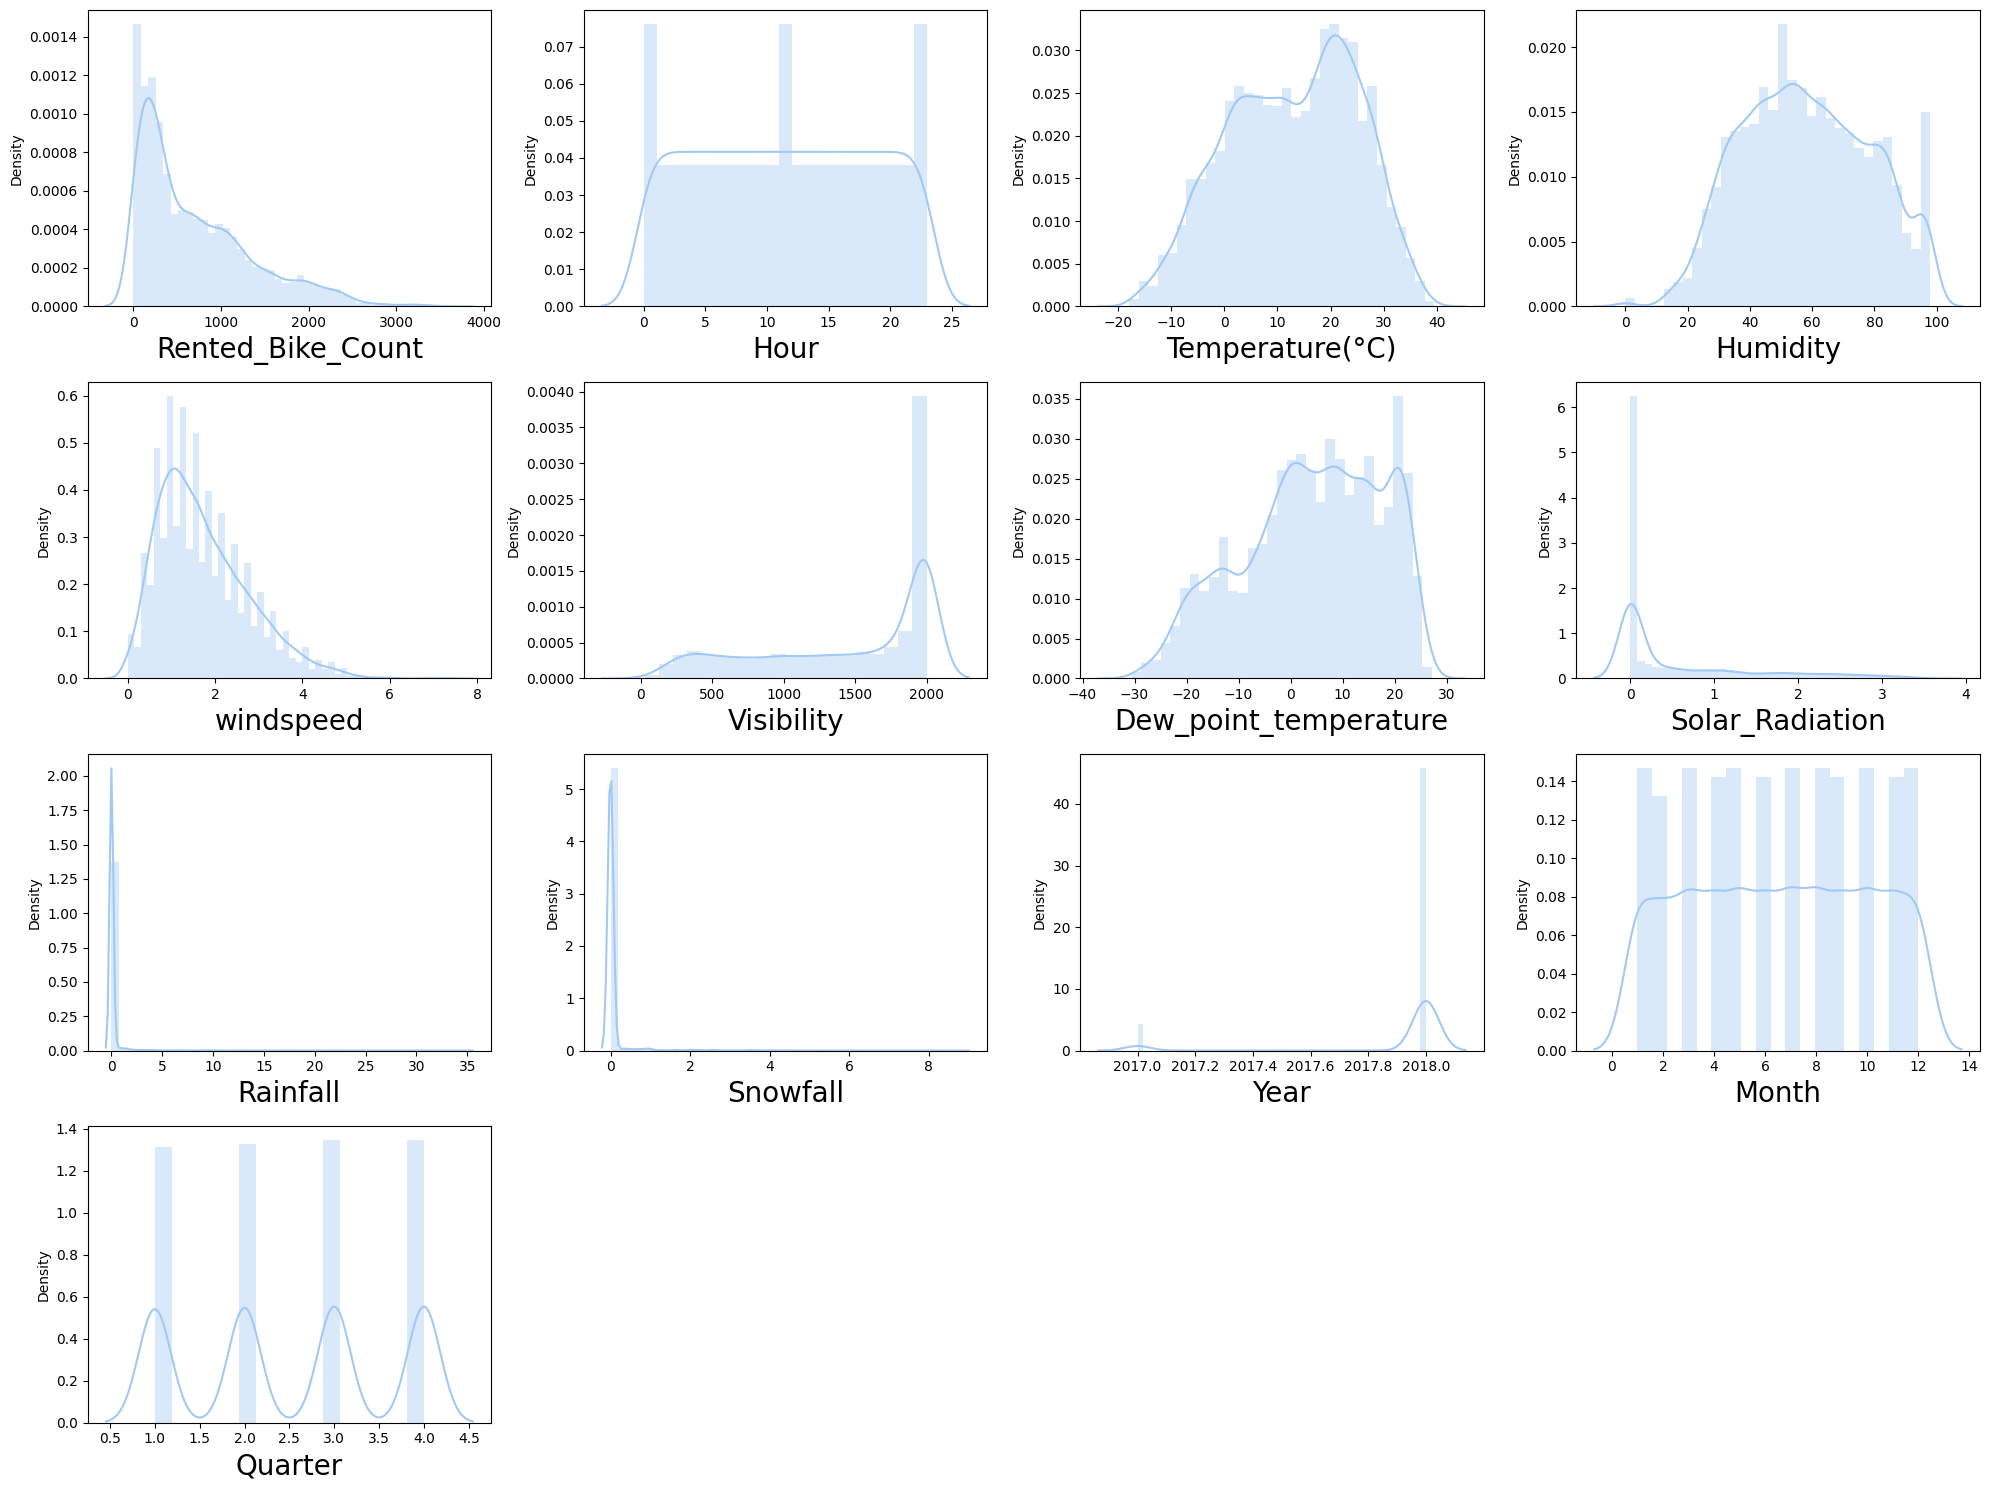

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
import math

# Will identify all numerical column from dataset and capture in one variable.

num_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter']]

plt.figure(figsize=(20,15))
plotnumber=1

for column in num_columns:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(num_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

# From above distribution plot we can check for all variables distribution. Along with same, 'Date' column is found that having dtype as datetime64[ns].
# So, insted of using Date column, will use 'Year','Month','Quarter'.

# Idenntify for dependent Variable (y) and independent variables (x).

x = bike_data[['Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter']]
y = bike_data['Rented_Bike_Count']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

print(y_pred_train)

# Predicting on test set results

y_pred = regressor.predict(x_test)

print(y_pred)

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)

[ 952.9443921  1428.01668503  841.72481077 ...  907.34738792  303.81868658
  594.23412916]
[334.20096972 644.37748957 563.73804117 ... 281.06020261 124.53776667
 592.76353899]


Mean Squared Error for first ML model-1 is: 218913.9460894791
Mean Absolute Error for first ML model-1 is: 345.81422576712987
Root Mean Squared Error for first ML model-1 is: 467.88240626195716
Regression Score on train set of ML Model-1 is 0.477653178391636
Regression Score on test set of ML Model-1 is: 0.4633681967029052


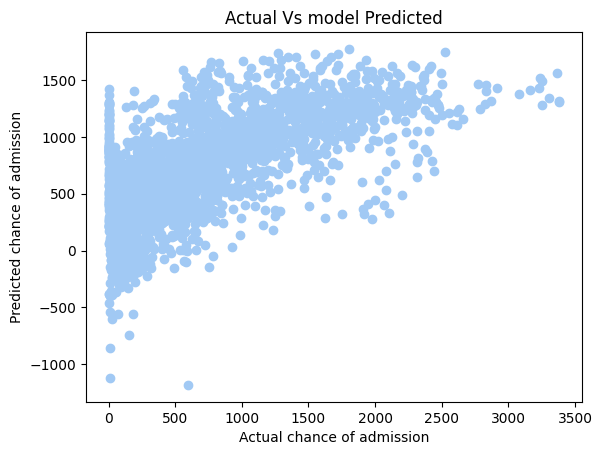

In [ ]:
print('Mean Squared Error for first ML model-1 is:', MSE)

print('Mean Absolute Error for first ML model-1 is:', MAE)

print('Root Mean Squared Error for first ML model-1 is:', RMSE)

print('Regression Score on train set of ML Model-1 is', r2score_train)

print('Regression Score on test set of ML Model-1 is:', r2score_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual Vs model Predicted')
plt.show()

**Regression Evaluation Metrics:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 1 MSE is **218913.94**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 1 MAE is  **345.81**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 1 MAE is **467.88**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 1 R squar for train set is **47.76%** and for test set is **46.33%**





#### Regularization for ML Model - 1

##### Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

0.46500038597304194


##### Ridge Regression

In [ ]:
# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

0.46362119088411435


In [ ]:
print('Lasso Regression for test set of ML Model-1 is:',lasso_test)
print('Ridge Regression for test set of ML Model-1 is:',ridge_test)

Lasso Regression for test set of ML Model-1 is: 0.46500038597304194
Ridge Regression for test set of ML Model-1 is: 0.46362119088411435


**Lasso Regression score for test set is 46.50%. Ridge Regression score for test set is 46.36%**

#### Cross- Validation & Hyperparameter Tuning for ML Model -1

##### With Lasso Regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

0.46500038597304194
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -220111.83181427643
MSE with Lasso Regression : 218498.01957290538
RMSE with Lasso Regression : 467.4377173195434
R2 with Lasso Regression : 0.4643877726623865
Adjusted R2 with Lasso Regression: 0.4619298962845466


##### With Ridge Regression

In [ ]:

ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

The best fit alpha value is found out to be : {'alpha': 0.3}

Using  {'alpha': 0.3}  the negative mean squared error is:  -219969.4857808219
MSE with Ridge Regression : 218598.11585891247
RMSE with Ridge Regression : 467.5447741755996
R2 with Ridge Regression : 0.46414240295697107
Adjusted R2 with Ridge Regression : 0.46168340059960344


**Regularization for ML Model - 1**

1.   Lasso Regression for test set of ML Model-1 : **46.50%**
2.   Ridge Regression for test set of ML Model-1 : **46.36%**

**Cross- Validation & Hyperparameter Tuning for ML Model -1**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 218498.01
2.   RMSE with Lasso Regression : 467.43
3.   R2 with Lasso Regression : 46.43%
4.   Adjusted R2 with Lasso Regression: 46.19%
5.   The best fit alpha value is found out to be : 0.1

##### With Ridge Regression:

1.   MSE with Ridge Regression : 218598.11
2.   RMSE with Ridge Regression : 467.54
3.   R2 with Ridge Regression : 46.41%
4.   Adjusted R2 with Ridge Regression : 46.16%
5.   The best fit alpha value is found out to be : 0.3

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**From the above results, we can observe that there haven't been any significant changes in evaluation metrics after applying regularization techniques and cross-validation. Therefore, we will explore another machine learning model**

## ***For ML Model-1, we only used numerical columns from the dataset. We did not consider any categorical columns. Now, for ML Model-2, we will encode the categorical columns and implement the model on the same dataset. We will then evaluate the results.***

### Categorical Encoding

In [ ]:
# Firsly will identity categorical columns from dataset.
# From .info() we can observe that 'Seasons','Holiday','Functioning Day' are object type and having categorical data in nature.

bike_data['Seasons']
bike_data['Holiday']
bike_data['Functioning_Day']

# Will use label encoder for each categorical column.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

bike_data['Seasons'] = label_encoder.fit_transform(bike_data['Seasons'])
bike_data['Holiday'] = label_encoder.fit_transform(bike_data['Holiday'])
bike_data['Functioning_Day'] = label_encoder.fit_transform(bike_data['Functioning_Day'])

# will check for updated dataset

bike_data.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity,windspeed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Quarter,Quarter-Year,Month,MM-YY
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,2017Q1,1,Jan-2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,2017Q1,1,Jan-2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,2017,1,2017Q1,1,Jan-2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,2017,1,2017Q1,1,Jan-2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,2017,1,2017Q1,1,Jan-2017


(6132, 15)
(2628, 15)
(6132,)
(2628,)
[[0.52173913 0.73239437 0.81632653 0.10810811 1.         0.89160839
  0.20454545 0.         0.         1.         0.81818182 1.
  0.66666667 1.         1.        ]
 [0.56521739 0.97535211 0.3877551  0.31081081 0.93289273 0.90384615
  0.86647727 0.         0.         1.         0.         0.
  0.66666667 1.         1.        ]
 [0.43478261 0.61619718 0.35714286 0.24324324 0.78139298 0.56643357
  0.64204545 0.         0.         1.         0.27272727 0.33333333
  0.33333333 1.         1.        ]
 [0.26086957 0.33802817 0.59183673 0.51351351 0.587697   0.43706294
  0.         0.         0.         1.         0.54545455 0.66666667
  0.33333333 1.         1.        ]
 [0.56521739 0.78521127 0.3877551  0.22972973 1.         0.73601399
  0.72727273 0.         0.         1.         0.81818182 1.
  0.         1.         1.        ]
 [0.39130435 0.82042254 0.7755102  0.2972973  0.51245552 0.96153846
  0.39204545 0.         0.         1.         0.36363636 0

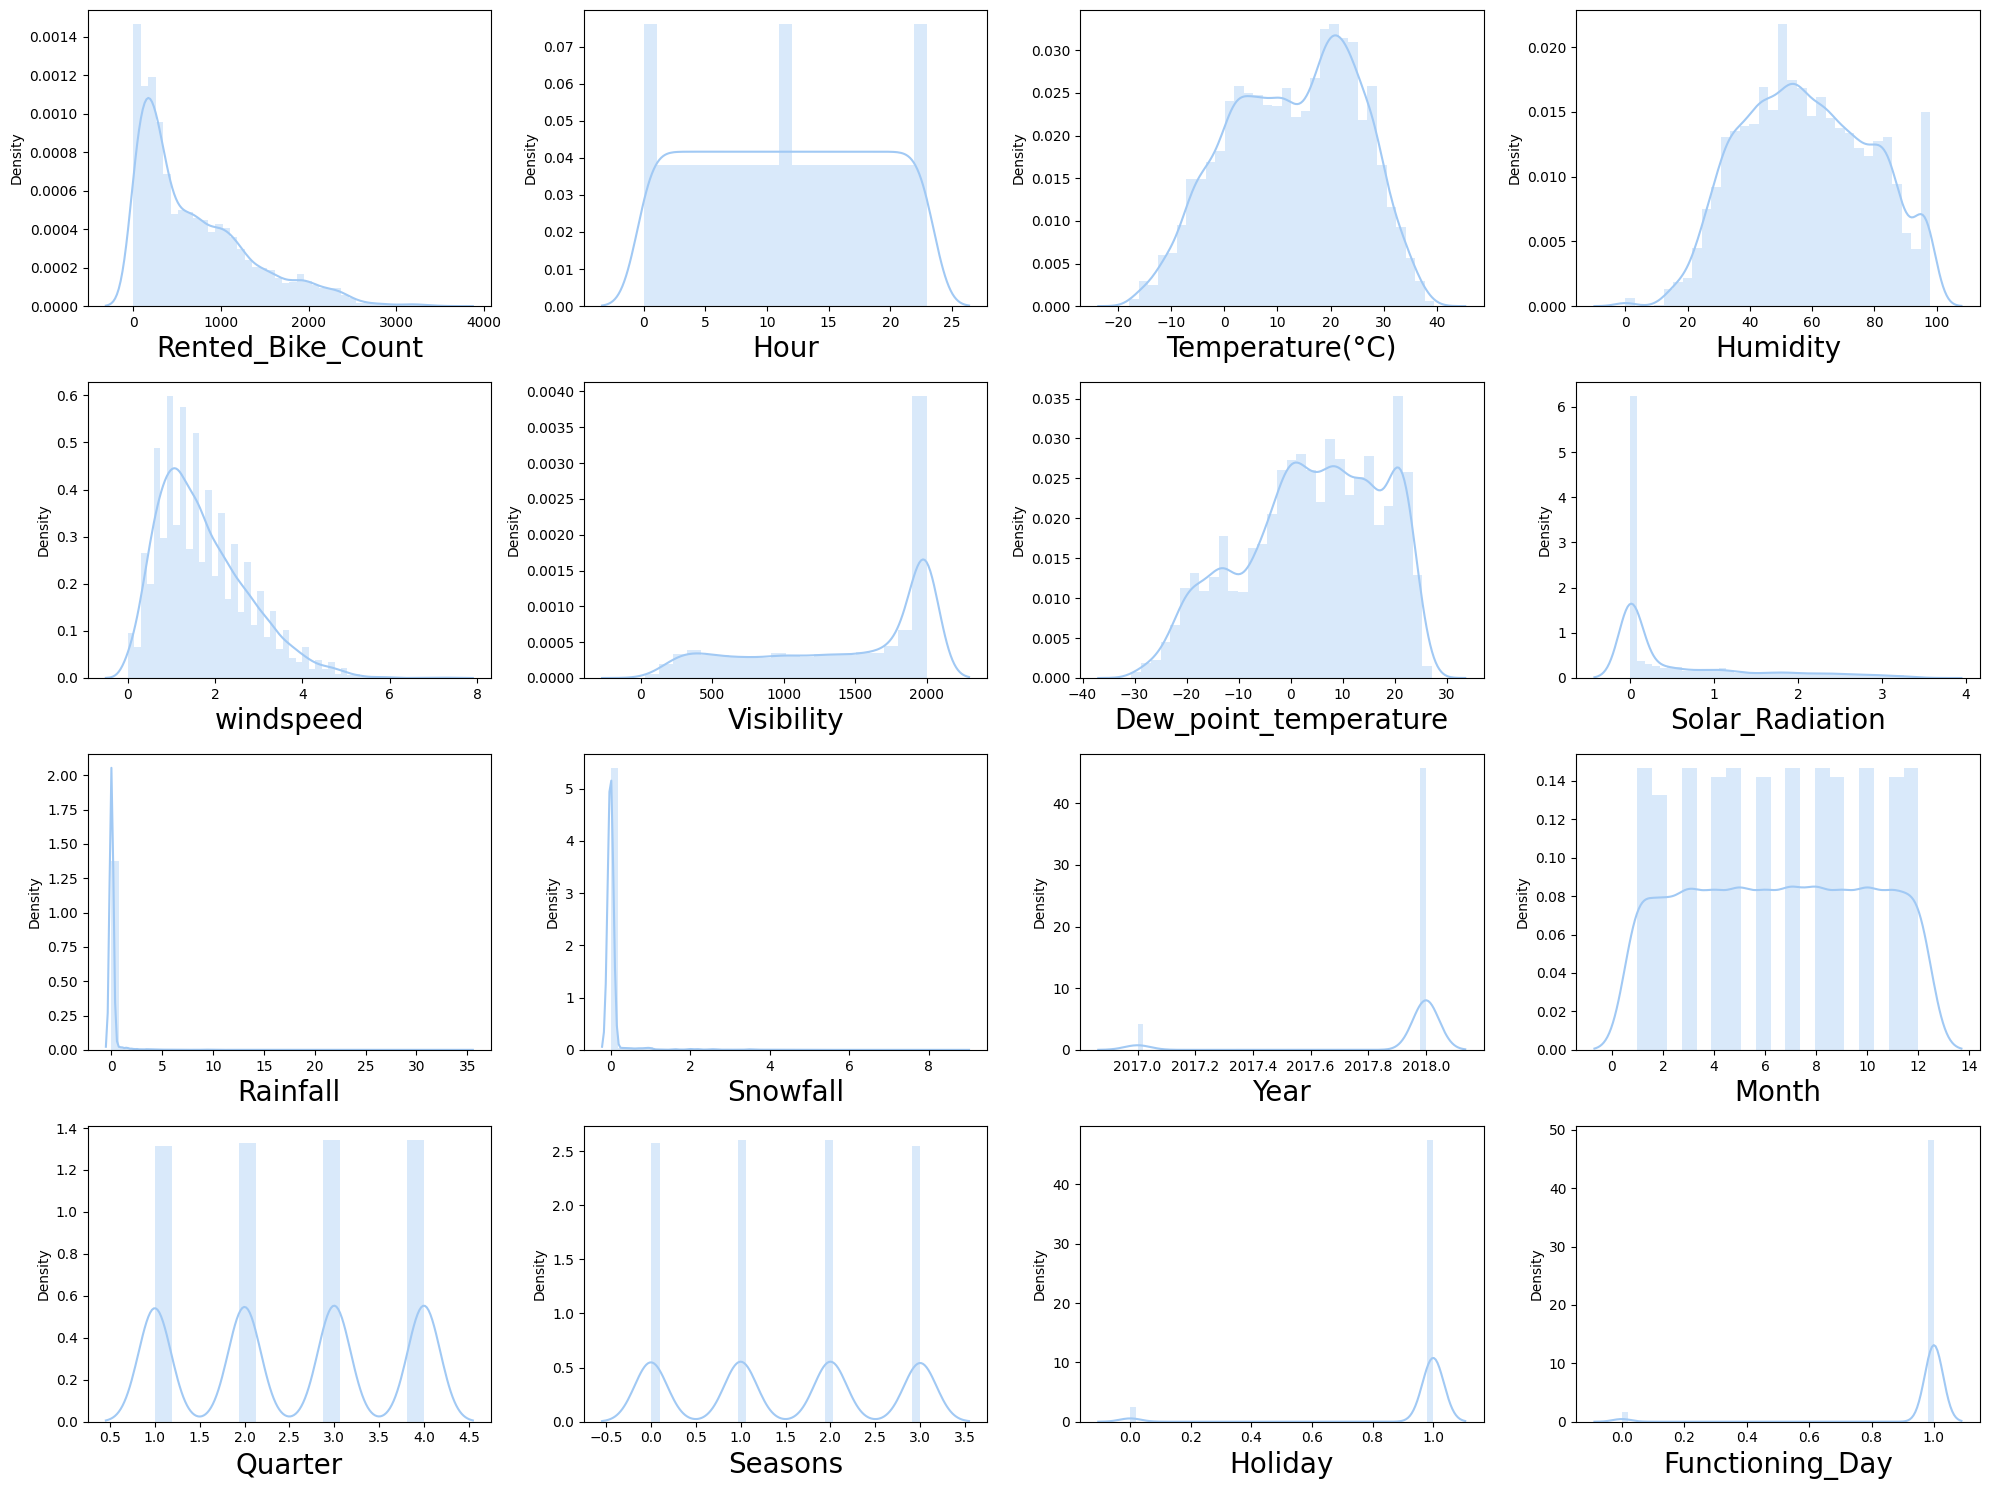

In [ ]:
# Will identify all numerical column from dataset and capture in one variable.

num_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter','Seasons','Holiday','Functioning_Day']]

plt.figure(figsize=(20,15))
plotnumber=1

for column in num_columns:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(num_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

# From above distribution plot we can check for all variables distribution. Along with same, 'Date' column is found that having dtype as datetime64[ns].
# So, insted of using Date column, will use 'Year','Month','Quarter'.

# Idenntify for dependent Variable (y) and independent variables (x).

x = bike_data[['Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter','Seasons','Holiday','Functioning_Day']]
y = bike_data['Rented_Bike_Count']

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train[0:10])
print(x_test[0:10])

[ 844.4857751  1410.76387374  913.59508315 ...  895.31260535  406.47404473
  715.8480924 ]
[430.33915421 822.87271786 530.09520279 ... 264.29076212 128.19114903
 705.70480835]
Mean Squared Error for first ML model-2 is: 189125.29920810484
Mean Absolute Error for first ML model-2 is: 322.1149617822593
Root Mean Squared Error for first ML model-2 is: 434.8853862894278
Regression Score on train set of ML Model-2 is 0.5543148681028204
Regression Score on test set of ML Model-2 is: 0.5363902018299714


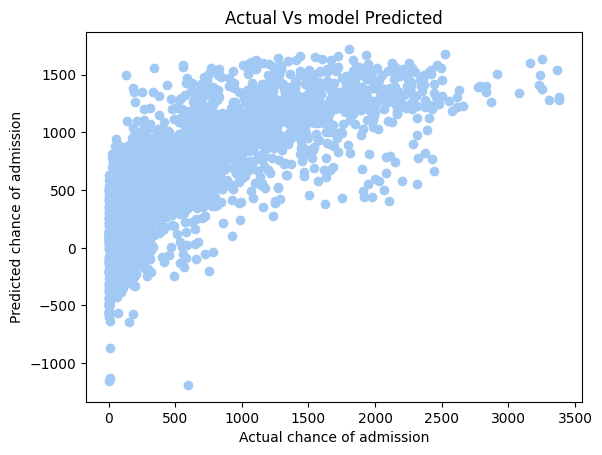

In [ ]:
# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

print(y_pred_train)

# Predicting on test set results

y_pred = regressor.predict(x_test)

print(y_pred)

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)

print('Mean Squared Error for first ML model-2 is:', MSE)

print('Mean Absolute Error for first ML model-2 is:', MAE)

print('Root Mean Squared Error for first ML model-2 is:', RMSE)

print('Regression Score on train set of ML Model-2 is', r2score_train)

print('Regression Score on test set of ML Model-2 is:', r2score_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual Vs model Predicted')
plt.show()

**Regression Evaluation Metrics:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 2 MSE is **189125.29**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 2 MAE is  **322.11**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 2 MAE is **434.88**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 2 R squar for train set is **55.43%** and for test set is **53.63%**

#### Regularization for ML Model - 2

##### Lasso Regression

In [ ]:
lasscv =LassoCV(alphas=None, max_iter=10)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

0.5376740054973836


##### Ridge Regression

In [ ]:
# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

0.5367476694804275


In [ ]:
print('Lasso Regression for test set of ML Model-2 is:',lasso_test)
print('Ridge Regression for test set of ML Model-2 is:',ridge_test)

Lasso Regression for test set of ML Model-2 is: 0.5376740054973836
Ridge Regression for test set of ML Model-2 is: 0.5367476694804275


**Lasso Regression score for test set is 53.76%. Ridge Regression score for test set is 53.67%**

#### Cross- Validation & Hyperparameter Tuning for ML Model -2

##### With Lasso Regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

0.5376740054973836
The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -188108.57450503588
MSE with Lasso Regression : 188490.85493394863
RMSE with Lasso Regression : 434.1553350287759
R2 with Lasso Regression : 0.5379454384012988
Adjusted R2 with Lasso Regression: 0.5352919857121792


##### With Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

The best fit alpha value is found out to be : {'alpha': 0.3}

Using  {'alpha': 0.3}  the negative mean squared error is:  -187864.69721506195
MSE with Ridge Regression : 188689.7041074013
RMSE with Ridge Regression : 434.3842816071978
R2 with Ridge Regression : 0.5374579921127448
Adjusted R2 with Ridge Regression : 0.5348017401532085


**Regularization for ML Model - 2**

1.   Lasso Regression for test set of ML Model-1 : **53.76%**
2.   Ridge Regression for test set of ML Model-1 : **53.67%**

**Cross- Validation & Hyperparameter Tuning for ML Model -2**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 188490.85
2.   RMSE with Lasso Regression : 434.15
3.   R2 with Lasso Regression : 53.79%
4.   Adjusted R2 with Lasso Regression: 53.52%
5.   The best fit alpha value is found out to be : 0.1

##### With Ridge Regression:

1.   MSE with Ridge Regression : 188689.70
2.   RMSE with Ridge Regression : 434.38
3.   R2 with Ridge Regression : 53.74%
4.   Adjusted R2 with Ridge Regression : 53.48%
5.   The best fit alpha value is found out to be : 0.3

**As we observed in the two ML models above, there is a slight improvement in MSE, MAE, RMSE, and train-test scores. This indicates that considering all columns from the dataset, rather than selecting only numerical columns, yields better results.**

### ML Model - 3

In [ ]:
outlier_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter','Seasons','Holiday','Functioning_Day']]

In [ ]:
def clip_outliers(bike_data):
    for col in outlier_columns:  # Iterate through column names
        # Using IQR method to define the range of upper and lower limit.
        q1 = bike_data[col].quantile(0.25)
        q3 = bike_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Replacing the outliers with upper and lower bound
        bike_data[col] = bike_data[col].clip(lower_bound, upper_bound)
    return bike_data

In [ ]:
# using the function to treat outliers
bike_data = clip_outliers(bike_data)

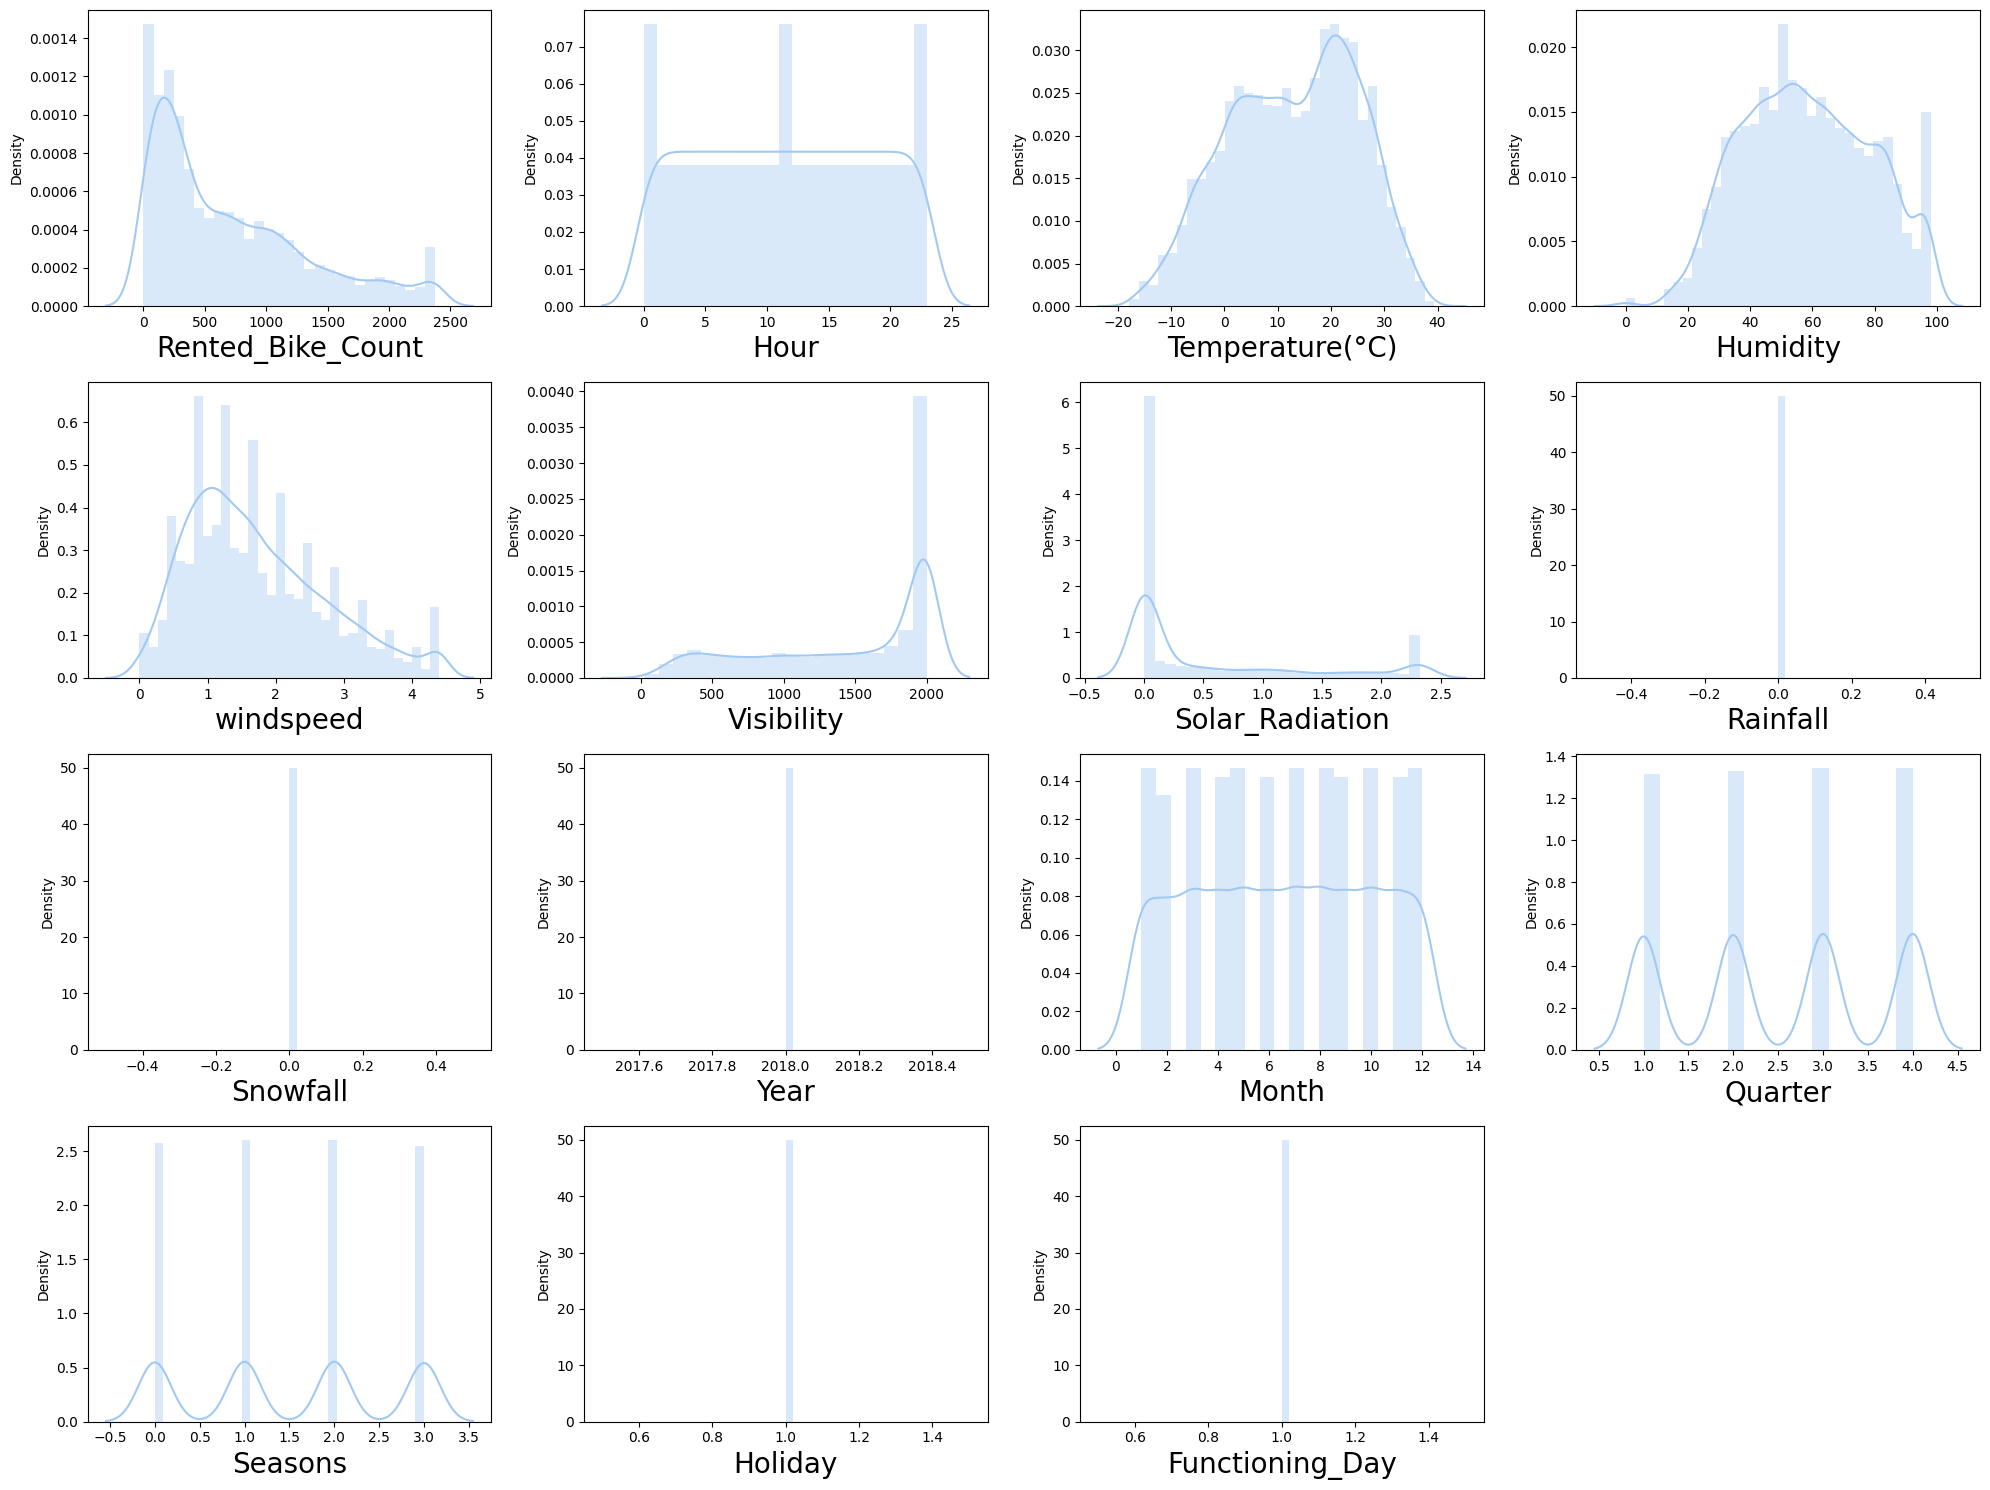

In [ ]:
outlier_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter','Seasons','Holiday','Functioning_Day']]

plt.figure(figsize=(20,15))
plotnumber=1

for column in outlier_columns:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(outlier_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

(6132, 8)
(2628, 8)
(6132,)
(2628,)
[ 563.29581743 1314.0055204   421.135885   ... 1259.33725254  610.1755738
  556.39328397]
[1177.44600693  291.25377863  810.2936833  ...  540.21658331  701.91118944
   26.21008281]
Mean Squared Error for first ML model-3 is: 213168.81858620283
Mean Absolute Error for first ML model-3 is: 345.5894540202917
Root Mean Squared Error for first ML model-3 is: 461.702088565996
Regression Score on train set of ML Model-3 is 0.47884069203260937
Regression Score on test set of ML Model-3 is: 0.46189480579680253


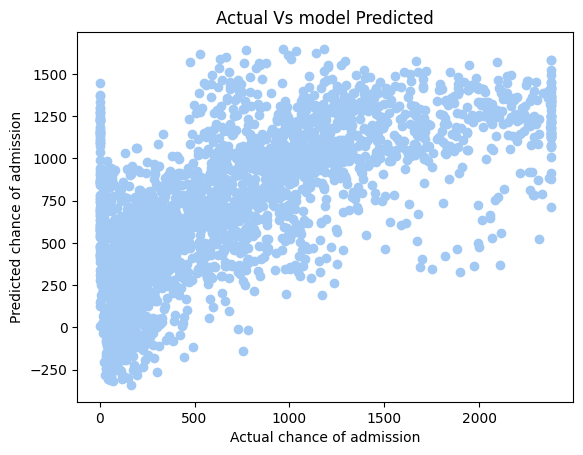

In [ ]:
x = bike_data[['Hour','Temperature(°C)','Humidity','windspeed','Seasons','Visibility','Functioning_Day','Holiday']]
y = (bike_data['Rented_Bike_Count'])

# splitting data into train and test set.


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=348)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

print(y_pred_train)

# Predicting on test set results

y_pred = regressor.predict(x_test)

print(y_pred)

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)

print('Mean Squared Error for first ML model-3 is:', MSE)

print('Mean Absolute Error for first ML model-3 is:', MAE)

print('Root Mean Squared Error for first ML model-3 is:', RMSE)

print('Regression Score on train set of ML Model-3 is', r2score_train)

print('Regression Score on test set of ML Model-3 is:', r2score_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual Vs model Predicted')
plt.show()


**Regression Evaluation Metrics:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 3 MSE is **213168**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 3 MAE is  **345.58**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 3 MAE is **461**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 3 R squar for train set is **47.88%** and for test set is **46.18%**

#### Regularization for ML Model - 3

##### Lasso Regression

In [ ]:
lasscv =LassoCV(alphas=None, max_iter=2000)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

0.46196665758938904


##### Ridge Regression

In [ ]:
# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

0.46190040594254045


In [ ]:
print('Lasso Regression for test set of ML Model-2 is:',lasso_test)
print('Ridge Regression for test set of ML Model-2 is:',ridge_test)

Lasso Regression for test set of ML Model-2 is: 0.46196665758938904
Ridge Regression for test set of ML Model-2 is: 0.46190040594254045


#### Cross- Validation & Hyperparameter Tuning for ML Model -3

##### With Lasso Regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(alpha)
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

0.46196665758938904
The best fit alpha value is found out to be : {'alpha': 0.5}

Using  {'alpha': 0.5}  the negative mean squared error is:  -204511.62498112168
MSE with Lasso Regression : 213121.78480315598
RMSE with Lasso Regression : 461.65115054893556
R2 with Lasso Regression : 0.46201353386936217
Adjusted R2 with Lasso Regression: 0.46037019987583605


##### With Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

The best fit alpha value is found out to be : {'alpha': 0.4}

Using  {'alpha': 0.4}  the negative mean squared error is:  -204479.6486844037
MSE with Ridge Regression : 213159.36172230612
RMSE with Ridge Regression : 461.691847147322
R2 with Ridge Regression : 0.4619186778978793
Adjusted R2 with Ridge Regression : 0.4602750541572085


**Regularization for ML Model - 3**

1.   Lasso Regression for test set of ML Model-4 : **46.19%**
2.   Ridge Regression for test set of ML Model-4 : **46.19%**

**Cross- Validation & Hyperparameter Tuning for ML Model -3**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 213121.78
2.   RMSE with Lasso Regression : 461.45
3.   R2 with Lasso Regression : 46.20%
4.   Adjusted R2 with Lasso Regression: 46.03%
5.   The best fit alpha value is found out to be : 0.5

##### With Ridge Regression:

1.   MSE with Ridge Regression : 213159.36
2.   RMSE with Ridge Regression : 461.69
3.   R2 with Ridge Regression : 46.19
4.   Adjusted R2 with Ridge Regression : 46.02%
5.   The best fit alpha value is found out to be : 0.4

#### **Checking for VIF and VIF Score**

In [ ]:
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

scalar = StandardScaler()

x_scaled =scalar.fit_transform(x)

In [ ]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.157196,Hour
1,1.199793,Temperature(°C)
2,1.694905,Humidity
3,1.200544,windspeed
4,1.143979,Seasons
5,1.459548,Visibility
6,NaN,Functioning_Day
7,NaN,Holiday


**All the VIF values are less than 5 and are very low. That meas no multicollinearity. Now, we can go ahead with fitting our data to the model.**

### ML Model - 4

#### knn Regression Model

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   float64       
 2   Hour                   8760 non-null   int64         
 3   Temperature(°C)        8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   windspeed              8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   int64         
 12  Holiday                8760 non-null   int64         
 13  Fun

In [ ]:
bike_data['Date'] = bike_data['Date'].astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif


x = bike_data[['Date', 'Hour', 'Temperature(°C)', 'Humidity',
       'windspeed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Year', 'Quarter','Month']]
y = (bike_data['Rented_Bike_Count'])

best_features = SelectKBest(score_func=f_classif,k=14)

fit = best_features.fit(x,y)

df_score = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)


feature_scores = pd.concat([df_columns,df_score],axis=1)

feature_scores.columns = ['Feature_Name','Score']

print(feature_scores.nlargest(14,'Score'))

       Feature_Name     Score
2   Temperature(°C)  3.662444
6   Solar_Radiation  2.481797
9           Seasons  2.202307
1              Hour  1.823273
0              Date  1.460710
3          Humidity  1.359120
5        Visibility  1.123487
4         windspeed  1.039271
13          Quarter  0.988508
14            Month  0.925048
7          Rainfall       NaN
8          Snowfall       NaN
10          Holiday       NaN
11  Functioning_Day       NaN


In [ ]:
best_features

SelectKBest(k=14)

In [ ]:
new_data = bike_data[['Date', 'Hour', 'Temperature(°C)', 'Humidity',
       'windspeed', 'Visibility', 'Solar_Radiation',
       'Seasons', 'Year', 'Quarter','Month']]

In [ ]:
new_data.head()

,Date,Hour,Temperature(°C),Humidity,windspeed,Visibility,Solar_Radiation,Seasons,Year,Quarter,Month
0,1484179200000000000,0,-5.2,37,2.2,2000,0.0,3,2018,1,1
1,1484179200000000000,1,-5.5,38,0.8,2000,0.0,3,2018,1,1
2,1484179200000000000,2,-6.0,39,1.0,2000,0.0,3,2018,1,1
3,1484179200000000000,3,-6.2,40,0.9,2000,0.0,3,2018,1,1
4,1484179200000000000,4,-6.0,36,2.3,2000,0.0,3,2018,1,1


In [ ]:
new_data.shape

(8760, 11)

In [ ]:
scalar = StandardScaler()

x_scalar = scalar.fit_transform(new_data)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size = 0.25,random_state =348)

# Will get one function and call as many as times to check accuracy_score of different models

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
  if train:
    y_pred = clf.predict(x_train)
    print(f'Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%')

  elif train==False:
    pred = clf.predict(x_test)

    print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')

    print('\n\n Test Classification Report \n',classification_report(y_test,pred,digits=2))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
    else:
        y_pred = model.predict(x_test)

    mse = mean_squared_error(y_train if train else y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train if train else y_test, y_pred)

    return mse, rmse, r2

# Calculate training and testing scores
train_mse, train_rmse, train_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=True)
test_mse, test_rmse, test_r2 = metric_score(knn, x_train, x_test, y_train, y_test, train=False)

print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)

print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R2:", test_r2)

Training MSE: 69053.47856525876
Training RMSE: 262.7802857241364
Training R2: 0.8235248511759988
Testing MSE: 121669.55709103882
Testing RMSE: 348.8116355442273
Testing R2: 0.6939654798362819


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
k_f =KFold(n_splits=5)

k_f

for train,test in k_f.split([12,23,35,46,51,63,75,86,96,108]):
  print('train : ',train,'test :',test)

cross_val_score(knn,x_scalar,y,cv=5)
cross_val_score(knn,x_scalar,y,cv=5).mean


train :  [2 3 4 5 6 7 8 9] test : [0 1]
train :  [0 1 4 5 6 7 8 9] test : [2 3]
train :  [0 1 2 3 6 7 8 9] test : [4 5]
train :  [0 1 2 3 4 5 8 9] test : [6 7]
train :  [0 1 2 3 4 5 6 7] test : [8 9]


<function ndarray.mean>

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd_tree','brute'],
              'leaf_size':[3,5,6,7,8],
              'n_neighbors': [3,5,7,9,11,13]}

gridsearch = GridSearchCV(estimator =knn,param_grid=param_grid)

gridsearch.fit(x_train,y_train)

gridsearch.best_score_

0.709649979209576

In [ ]:
gridsearch.best_estimator_

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [ ]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False)  # for testing score

(121669.55709103882, 348.8116355442273, 0.6939654798362819)

**knn Model**

1.   Training MSE on knn Model : **69021**
2.   Training RMSE on knn Model: **262.71**
3.   Training R2 on knn Model : **82.36%**
4.   Testing MSE on knn Model: **121562.01**
5.   Testing RMSE on knn Model: **348.65**
6.   Testing R2 on knn Model: **69.42%**

### ML Model - 5

#### Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

x = bike_data[['Date', 'Hour', 'Temperature(°C)', 'Humidity',
       'windspeed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Year', 'Quarter','Month']]
y = (bike_data['Rented_Bike_Count'])

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=348)

from sklearn.metrics import mean_squared_error, r2_score

def metric_score(model, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        mse = mean_squared_error(y_train, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_train, y_pred)
        print('\n======Train Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')
    else:
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print('\n======Test Result======')
        print(f'Mean Squared Error (MSE): {mse:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R2): {r2:.2f}')

In [ ]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Calling above function and passing dataset to check train and test score

metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00

======Test Result======
Mean Squared Error (MSE): 162809.53
Root Mean Squared Error (RMSE): 403.50
R-squared (R2): 0.59


In [ ]:
grid_param = {
    'criterion': ['squared_error'],
    'max_depth': range(5, 10),
    'min_samples_leaf': range(1, 3),
    'min_samples_split': range(1, 5),
    'max_leaf_nodes': range(3, 6)
}

In [ ]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1,
                           error_score=np.nan)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(5, 10),
                         'max_leaf_nodes': range(3, 6),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 5)})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
clf = DecisionTreeRegressor(criterion='squared_error',min_samples_split=2,max_depth=8,min_samples_leaf=3)

clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3)

In [ ]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True) # for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False)  # for testing score


======Train Result======
Mean Squared Error (MSE): 83912.41
Root Mean Squared Error (RMSE): 289.68
R-squared (R2): 0.79

======Test Result======
Mean Squared Error (MSE): 123504.03
Root Mean Squared Error (RMSE): 351.43
R-squared (R2): 0.69


**Decision Tree Regression Model**

**Train Result**:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00

**Test Result**:
Mean Squared Error (MSE): 164061.78
Root Mean Squared Error (RMSE): 405.05
R-squared (R2): 59%


**Results after Hypertuning**

**Train Result**:
Mean Squared Error (MSE): 83912.41
Root Mean Squared Error (RMSE): 289.68
R-squared (R2): 79%

**Test Result**:
Mean Squared Error (MSE): 122456.82
Root Mean Squared Error (RMSE): 349.94
R-squared (R2): 69%

# ML Model 6

## ***For ML Model-1, we exclusively used numerical columns from the dataset. In contrast, for ML Model-2, we encoded the categorical columns and implemented the ML model with all columns from the dataset. Now, for ML Model-3, we will address outliers and treat them into the model.***

### Handling Outliers

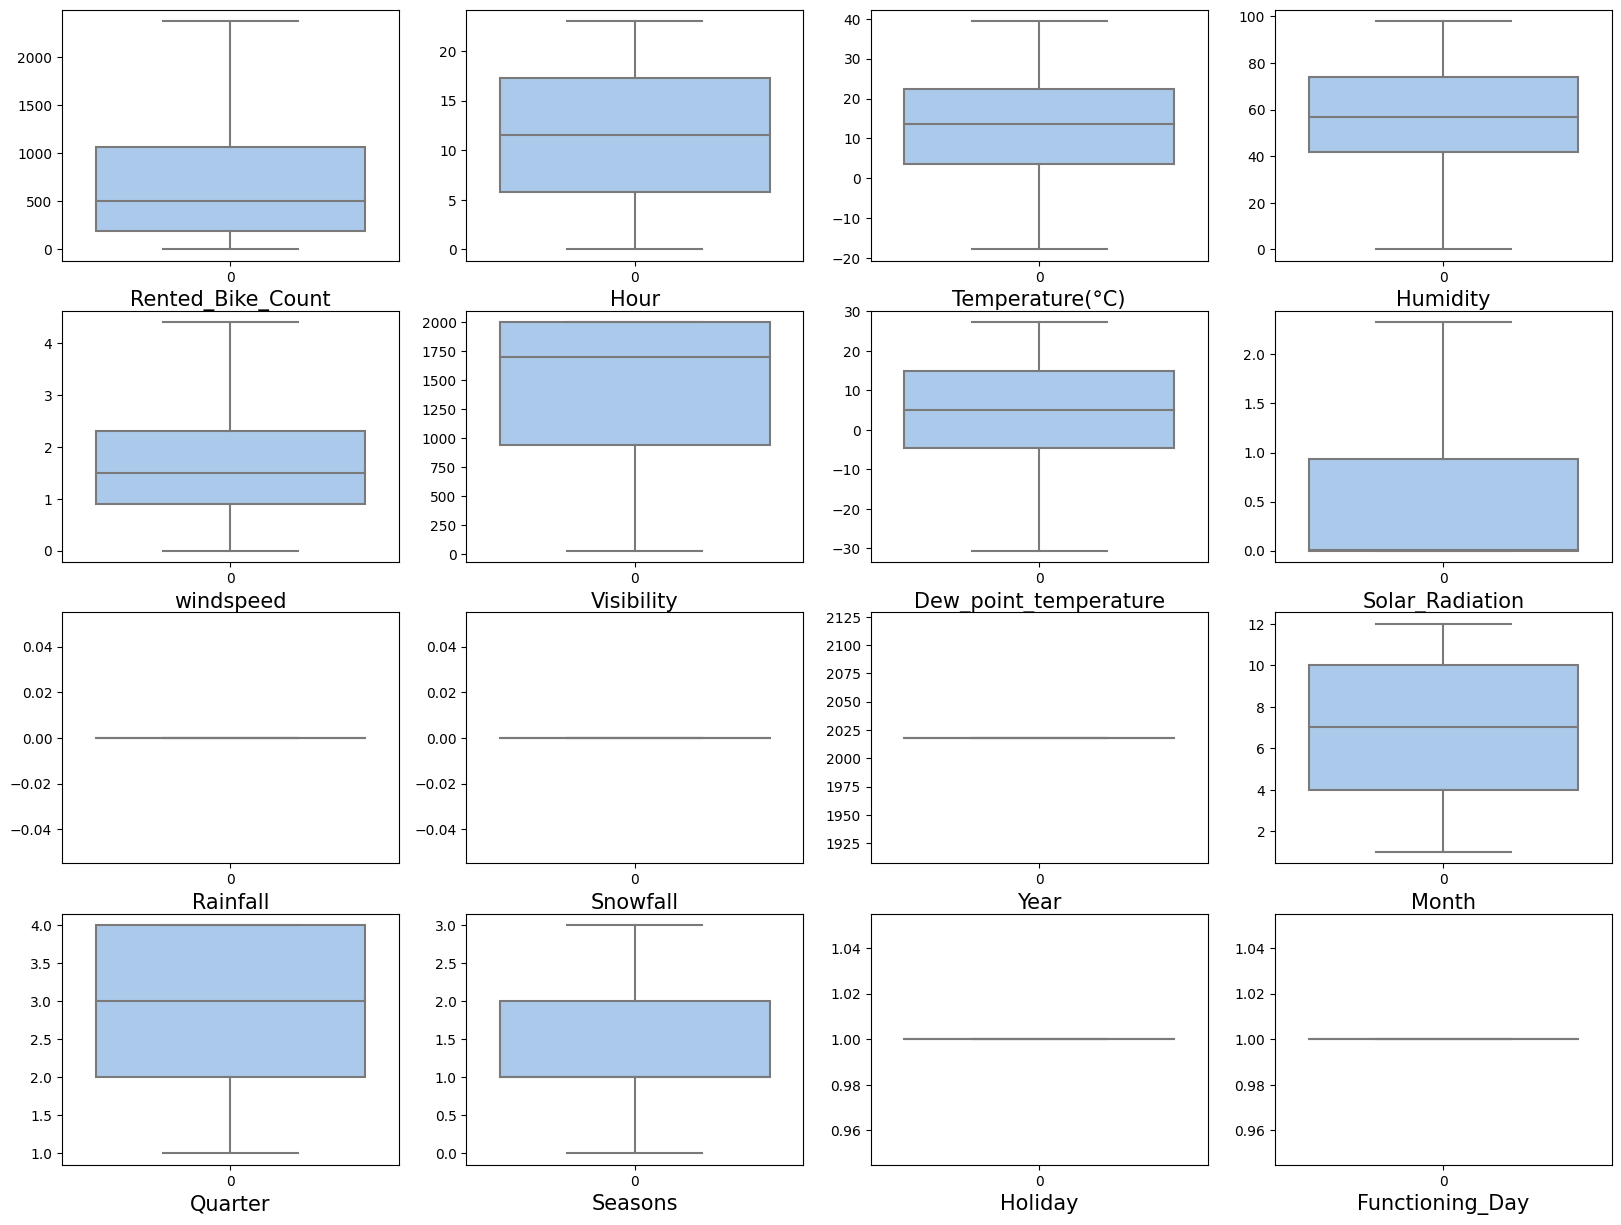

In [ ]:
num_columns = bike_data[['Rented_Bike_Count','Hour','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation',
                        'Rainfall','Snowfall','Year','Month','Quarter','Seasons','Holiday','Functioning_Day']]

plt.figure(figsize=(20,15))
graph = 1

for column in num_columns:
  if graph<=16:
    plt.subplot(4,4,graph)
    ax=sns.boxplot(data= num_columns[column])
    plt.xlabel(column,fontsize=15)
  graph+=1
plt.show()

In [ ]:
bike_data.shape

(8760, 19)

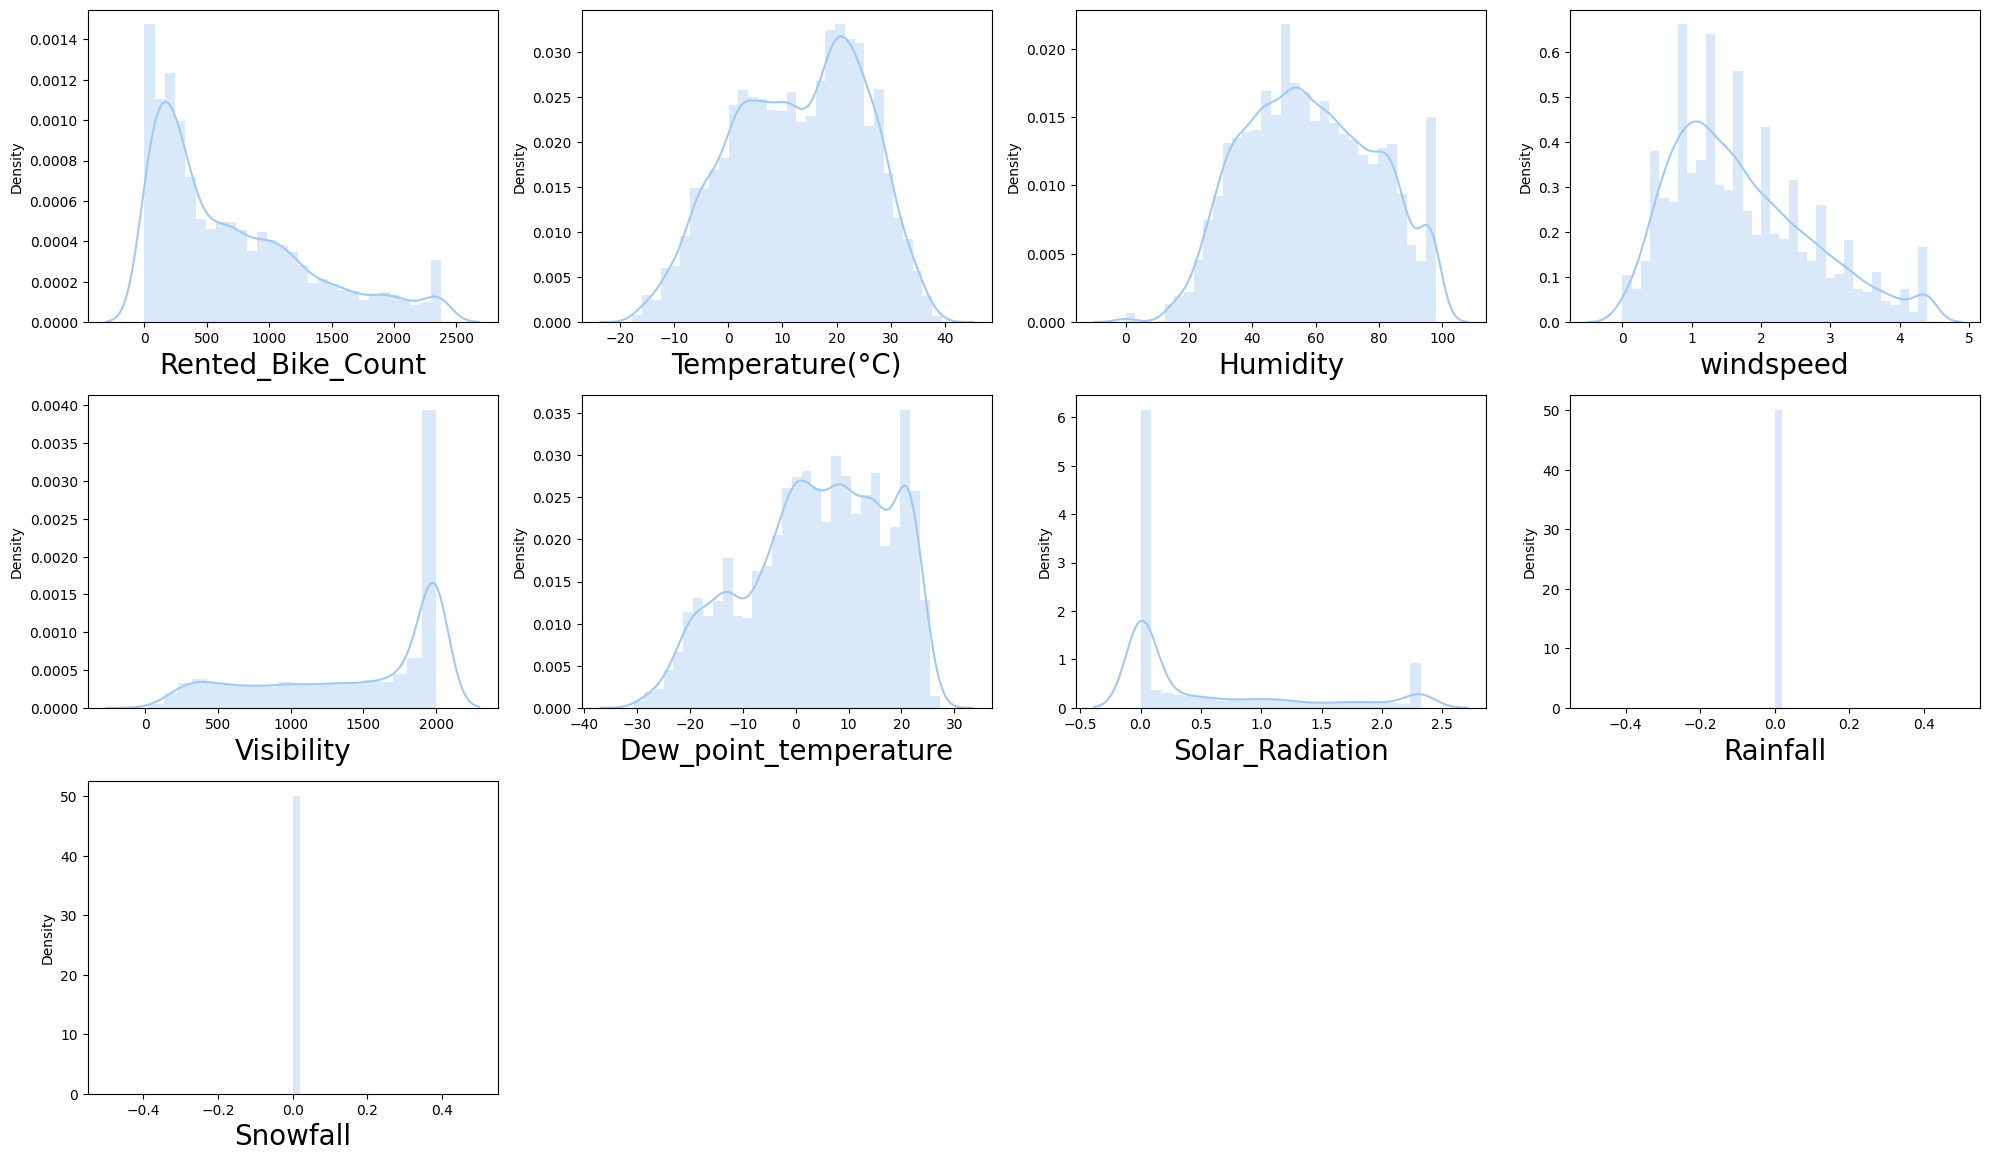

In [ ]:
num_columns = bike_data[['Rented_Bike_Count','Temperature(°C)','Humidity','windspeed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]

plt.figure(figsize=(20,15))
plotnumber=1

for column in num_columns:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(num_columns[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

In [ ]:
numerical_features = []
categorical_features = []

for col in bike_data.columns:
  if bike_data[col].nunique() > 35:
    numerical_features.append(col)
  else:
    categorical_features.append(col)

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['Date', 'Rented_Bike_Count', 'Temperature(°C)', 'Humidity', 'windspeed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']
Categorical Features : ['Hour', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year', 'Quarter', 'Quarter-Year', 'Month', 'MM-YY']


In [ ]:
def clip_outliers(bike_data):
    for col in bike_data[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_data[col].quantile(0.25)
        q3 = bike_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        bike_data[col] = bike_data[col].clip(lower_bound, upper_bound)
    return bike_data

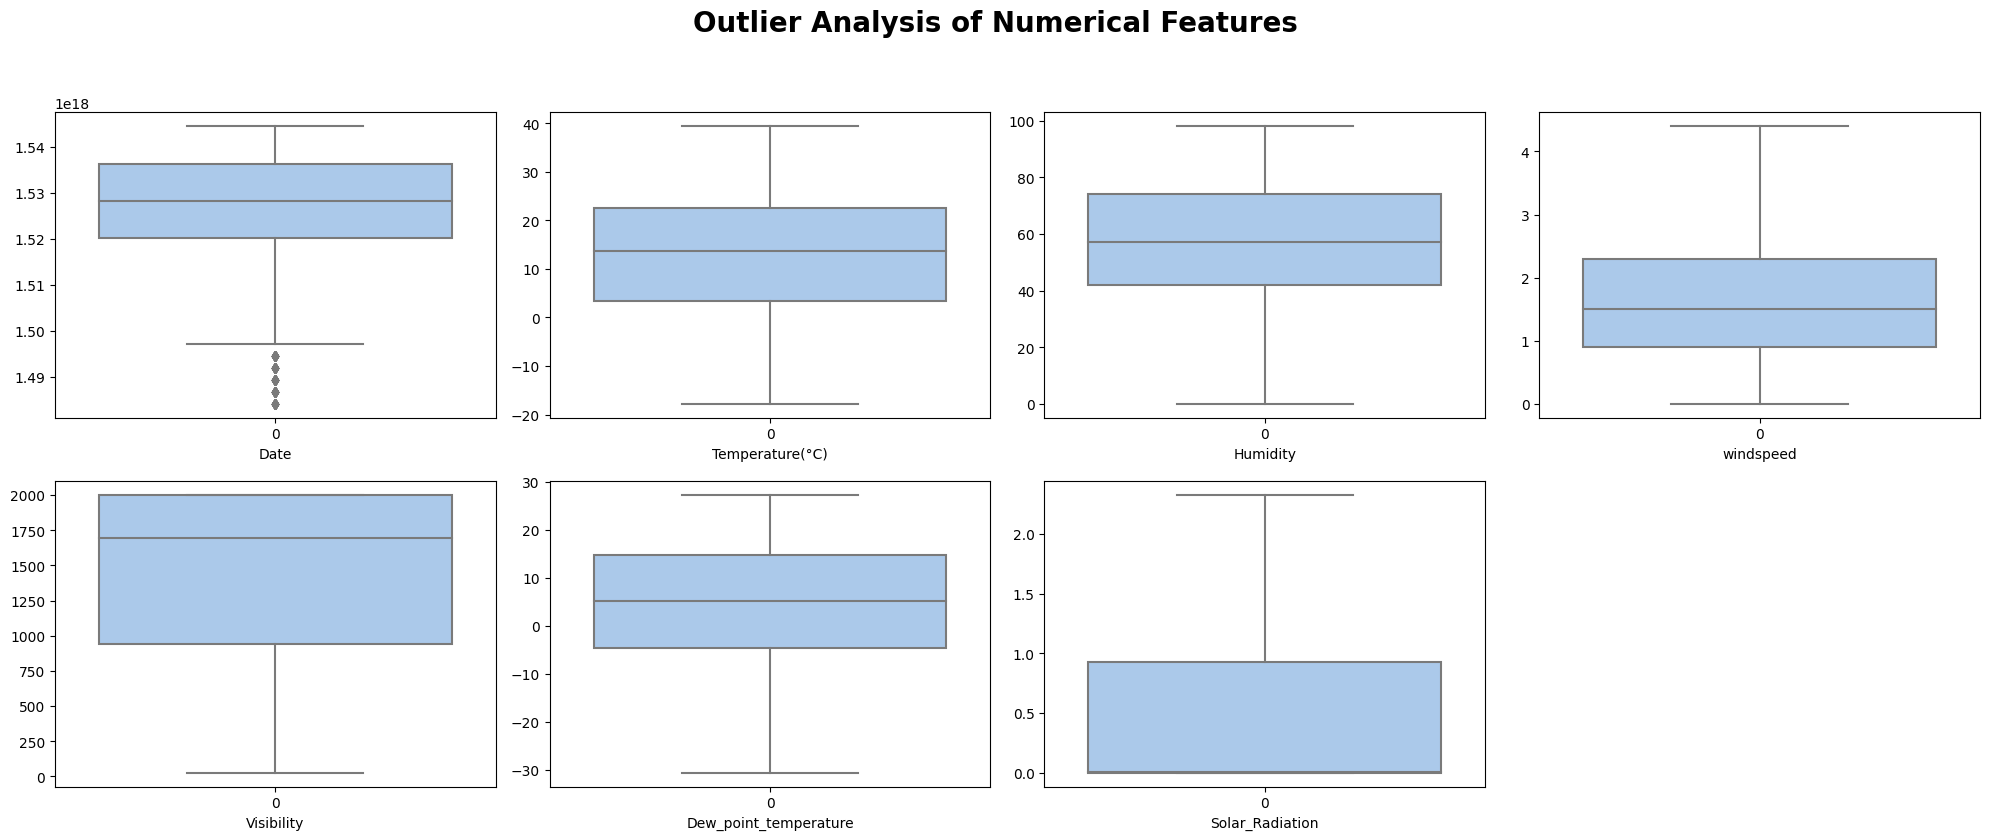

In [ ]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(20,15))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(4, 4, i+1)            # subplot of 3 rows and 2 columns

  # countplot
  sns.boxplot(bike_data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

In [ ]:
# using the function to treat outliers
bike_data = clip_outliers(bike_data)

**Since dew_point_temperature and temperature have a correlation coefficient of 0.91 and dew_point_temperature is less correlated to our target variable hence dropping dew_point_temperature.**

In [ ]:
# droping dew_point_temperature column due to multi-collinearity

bike_data.drop('Dew_point_temperature', axis=1, inplace=True)

In [ ]:
print(numerical_features)

['Date', 'Temperature(°C)', 'Humidity', 'windspeed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation']


In [ ]:
bike_data['Date'].astype(np.int64)
bike_data['Date'] = bike_data['Date'].astype(int)
bike_data = bike_data.assign(Timestamp=bike_data['Date'], inplace=True)



In [ ]:
# After treating with outliers will consider for below column as dependent variable(x)


x = bike_data[['Date', 'Temperature(°C)', 'Humidity', 'windspeed', 'Visibility','Solar_Radiation']]
y = (bike_data['Rented_Bike_Count'])

# splitting data into train and test set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=248)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# Transforming data standardization

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train[0:10]
x_test[0:10]

(7008, 6)
(1752, 6)
(7008,)
(1752,)


array([[0.72695035, 0.57699115, 0.91836735, 0.27272727, 0.41713127,
        0.        ],
       [0.69503546, 0.77522124, 0.34693878, 0.20454545, 0.89457679,
        1.        ],
       [0.98758865, 0.43539823, 0.58163265, 0.18181818, 0.87126204,
        0.        ],
       [0.75177305, 0.94336283, 0.5       , 0.63636364, 0.62696401,
        1.        ],
       [0.85460993, 0.63539823, 0.92857143, 0.27272727, 0.18601115,
        0.10752688],
       [0.62411348, 0.56637168, 0.98979592, 0.65909091, 0.16827167,
        0.        ],
       [0.9964539 , 0.74867257, 0.44897959, 0.47727273, 0.97719209,
        1.        ],
       [0.82446809, 0.40530973, 0.6122449 , 0.88636364, 0.4880892 ,
        0.00860215],
       [0.93085106, 0.14336283, 0.29591837, 0.43181818, 0.9832742 ,
        0.01290323],
       [0.44503546, 0.25486726, 0.68367347, 0.13636364, 0.6877851 ,
        0.        ]])

[963.42688789 608.86126654 750.12606038 ... 553.8540567  102.94384128
 660.68045527]
[ 483.37050055 1166.79869043  596.82235339 ... 1079.31887813 1118.94715419
    9.2133437 ]
Mean Squared Error for first ML model-6 is: 228974.44553739403
Mean Absolute Error for first ML model-6 is: 360.20139389657083
Root Mean Squared Error for first ML model-6 is: 478.5127433385594
Regression Score on train set of ML Model-6 is 0.40249621596692675
Regression Score on test set of ML Model-6 is: 0.38301241244395867


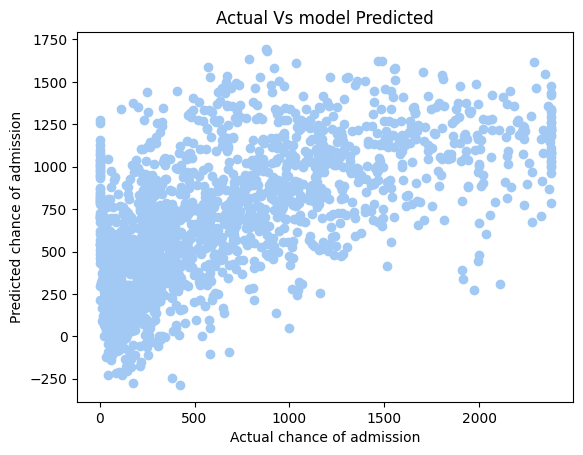

In [ ]:
# Fitting linear regressio to training set

regressor = LinearRegression()

regressor.fit(x_train,y_train)

regressor.intercept_

regressor.coef_

# will predict on x_train

y_pred_train = regressor.predict(x_train)

print(y_pred_train)

# Predicting on test set results

y_pred = regressor.predict(x_test)

print(y_pred)

# We already have actual bike rented count in y_test

# After prediction on test and train dataset. Will check with Evalution Metrics.

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
r2score_train = r2_score(y_train,y_pred_train)
r2score_test = r2_score(y_test,y_pred)
train_score = regressor.score(x_train,y_train)
test_score = regressor.score(x_test,y_test)

print('Mean Squared Error for first ML model-6 is:', MSE)

print('Mean Absolute Error for first ML model-6 is:', MAE)

print('Root Mean Squared Error for first ML model-6 is:', RMSE)

print('Regression Score on train set of ML Model-6 is', r2score_train)

print('Regression Score on test set of ML Model-6 is:', r2score_test)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual Vs model Predicted')
plt.show()

**Regression Evaluation Metrics:**

*   Mean Squared Error (MSE):MSE calculates the average squared difference between the predicted and actual values. For ML Model 6 MSE is **228974**
*   Mean Absolute Error (MAE): MAE calculates the average absolute difference between the predicted and actual values.For ML Model 6 MAE is  **360.20**
*   Root Mean Squared Error (RMSE): RMSE is the square root of MSE and is in the same units as the target variable.For ML Model 6 MAE is **478**
*   R squared (R^2): R squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.For ML Model 6 R squar for train set is **40.24%** and for test set is **38.20%**

#### Regularization for ML Model - 6

##### Lasso Regression

In [ ]:
lasscv =LassoCV(alphas=None, max_iter=1000)
lasscv.fit(x_train,y_train)

# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

0.38318858043254156


##### Ridge Regression

In [ ]:
# Now will impliment for ridge regression

np.arange(0.001,0.1,0.01)

# RidgeCV will return best alpha and coefficient afer 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_test = ridge_model.score(x_test,y_test)

print(ridge_test)

0.38304300919292


In [ ]:
print('Lasso Regression for test set of ML Model-3 is:',lasso_test)
print('Ridge Regression for test set of ML Model-3 is:',ridge_test)

Lasso Regression for test set of ML Model-3 is: 0.38318858043254156
Ridge Regression for test set of ML Model-3 is: 0.38304300919292


#### Cross- Validation & Hyperparameter Tuning for ML Model -6

##### With Lasso Regression

In [ ]:
# For Best alpha parameter,alpha value gives us learning rate for our model.

alpha =lasscv.alpha_

# First will impliment for Lasso Regression

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

# Will check for lasso Score

lasso_test=(lasso_reg.score(x_test,y_test))

print(lasso_test)

# Cross- Validation & Hyperparameter Tuning implimentatiion for Lasso Regression

# Cross-Validation

from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(0.001, 5.1, 100)

lasso_reg = Lasso(alpha)
parameters = {'alpha': alpha_values}
lasso_regressor = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE with Lasso Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Lasso Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 with Lasso Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_lasso)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Lasso Regression:',adjusted_r2)

0.38318858043254156
The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -238452.53143214117
MSE with Lasso Regression : 228973.51469845927
RMSE with Lasso Regression : 478.51177070001035
R2 with Lasso Regression : 0.383014920654285
Adjusted R2 with Lasso Regression: 0.38089348198604756


##### With Ridge Regression

In [ ]:
ridge = Ridge()
parameters = {'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,55,60,100,200,300,400]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE with Ridge Regression :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE with Ridge Regression :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 with Ridge Regression :" ,r2)

adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred_ridge)) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))
print('Adjusted R2 with Ridge Regression :',adjusted_r2)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -238403.90454606642
MSE with Ridge Regression : 228961.9743818293
RMSE with Ridge Regression : 478.4997119976451
R2 with Ridge Regression : 0.3830460168410251
Adjusted R2 with Ridge Regression : 0.38092468509377364


**Regularization for ML Model - 6**

1.   Lasso Regression for test set of ML Model-3 : **38.31%**
2.   Ridge Regression for test set of ML Model-3 : **38.30%**

**Cross- Validation & Hyperparameter Tuning for ML Model -6**
##### With Lasso Regression:

1.   MSE with Lasso Regression : 228973.51
2.   RMSE with Lasso Regression : 478.51
3.   R2 with Lasso Regression : 38.30%
4.   Adjusted R2 with Lasso Regression: 38.08
5.   The best fit alpha value is found out to be : 0.001

##### With Ridge Regression:

1.   MSE with Ridge Regression : 228961.97
2.   RMSE with Ridge Regression : 478.49
3.   R2 with Ridge Regression : 38.30
4.   Adjusted R2 with Ridge Regression : 38.09
5.   The best fit alpha value is found out to be : 0.1

# **Conclusion**



1.   **Steady increase in number of rented bikes each year also 2018 was good number as compaired to 2017.For Qtr2 of 2018 were highest number of rented bikes, while for Qtr4 for 2017 were lowest numbers.For June 2018 were higest numbers, while for Oct-2017 were lowest numbers.** (From Chart-1)

2.   **Bike rentals during holidays are highest compared to non-holidays. From Pie plot 97% rented bike on non-holidays, while only 3% rentd on holidays.** (From Chart-2)
3.   **'Summer'season had more number while 'winter' season had very less number of rented bike.We can say users are more lying on rented bike on 'Summer' season to stay fit.** (From Chart-3)


4.   **18th hour is peak while 14th hour is least one for rented bike count.**(From Chart-4)

5.   **Data point distribution of all numerical columns againt rented bike count.For variables like 'Date','Hour','Temprature','Humedity','Visibility' plot is spreded in equally, that means they are directly proportional to each others.we can observe for trends and patterns like 'Temperature(°C)' has a strong positive effect on 'Rented Bike Count' up to a certain temperature and vice versa for 'Rainfall' and 'Snowfall'** (From Chart-7)

6.   **Yearly/Monthly/quarterly seems like positive trend means rented bike count inreacsing Yearly/Monthly/quarterly.There is a positive correlation between temperature and bike rentals. More bikes are rented as the temperature rises.Bike rentals seems to decrease as humidity levels increase. The most bike rentals occur on days with humidity levels between 30% and 60%, and rentals decrease significantly on very humidity days.Bike rentals show a slight negative correlation with wind speed. Rentals tend to be highest on days with low to moderate wind speeds, while very windy days have lower bike rental counts. A negative trend indicates that as rainfall and snowfall increases, bike rentals tend to decrease.** (From Chart-8)
7.   **'Temperature(°C)' column is normally distributed, while the 'Rainfall(mm)' and 'Snowfall(Cm)' column is positively skewed.Can observe pattern for 'Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Dew Point Temperature(°C)','Solar Radiation (MJ/m2)' we can identify for each variable there perticular peak and lower.Can observe that distribution of rental counts over different hours of the day. This indicates that for certain hour most bike rentals occur and whether there are variations by time of day.** (From Chart-9)

8.   **'Temperature(°C)' and 'Dew_point_temperature' show a very strong corelation it indicated that change in temperature will also change in Dew_point_temperature.'Temperature(°C)' and 'Solar Radiation (MJ/m2)' have a strong positive correlation.It indicates that as temperature increases, solar radiation tends to increase.'Temperature(°C)' and 'Snowfall(Cm)' have a strong negative correlation.It indicates that as temperature increases, the amount of Snowfall tends to decrease.'Rainfall(mm)' and 'Wind speed (m/s)' show a correlation it indicates that changes in wind speed are not strongly related to changes in rainfall.** (From Chart-10)

9.   **Median for 'Rented Bike Count' is highest at a specific hour, it indicates that a peak usage time. Similarly, if the median for 'Temperature(°C)' is higher in a certain range, it indicates a preferred temperature for bike rentals.There are numerous outliers in 'Rainfall(mm)','Snowfall(Cm)' on certain days, it may indicate a heavy rain and Snow event that affects bike rentals.**


#### **Hypothesis Testing**
1.   **Reject the null hypothesis: There is a significant difference in the number of rented bikes on rainy days.**
2.   **Reject the null hypothesis: There is a significant difference in the number of rented bikes on Solar_Radiation.**
3.   **Reject the null hypothesis: There is a significant difference in the number of rented bikes on clear days.**

#### **ML Model Results**


1.   **ML Model-1 R-squar for train set is 47.76% and for test set is 46.33%. Lasso Regression for test set of ML Model-1 : 46.50%. Ridge Regression for test set of ML Model-1 : 46.36%.**

2.   **ML Model-2 R squar for train set is 55.43% and for test set is 53.63%. Lasso Regression for test set of ML Model-2 : 53.76%. Ridge Regression for test set of ML Model-2 : 53.67%**

3.   **ML Model 3 R squar for train set is 39.54% and for test set is 37.49%. Lasso Regression for test set of ML Model-3 : 39.27%. Ridge Regression for test set of ML Model-3 : 39.26%.**
4.   **ML Model 4 R squar for train set is 47.88% and for test set is 46.18%. Lasso Regression for test set of ML Model-4 : 39.27%. Ridge Regression for test set of ML Model-4 : 39.26%**


5.   **Training R2 on knn Model : 82.36%,Testing R2 on knn Model: 69.42%.**


6.   **R-squared for Decision Tree Regression Model on train set : 1.00 , R-squared for Decision Tree Regression Model on test set : 59%. After hypertuning -squared for Decision Tree Regression Model on train set : 79% , R-squared for Decision Tree Regression Model on test set : 69%**

## **From above 6 ML model we can observe that knn model is giving best result on train and test dataset.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# ***Thank You***